In [25]:
#Create Access to my code
import sys
sys.path.insert(1, '../vidr/')

#Import hte vaedr functions we have created
from vidr import VIDR
from PCAEval import PCAEval
from utils import *

#Import important modules
import scanpy as sc
import scgen as scg
import pandas as pd
import numpy as np
import torch
import seaborn as sns
from scipy import stats
from scipy import linalg
from scipy import spatial
from anndata import AnnData
from scipy import sparse
from statannotations.Annotator import Annotator
from matplotlib import pyplot as plt

#For calculating statistical distance
import geomloss
import pykeops
import pykeops
pykeops.clean_pykeops()          # just in case old build files are still present
pykeops.test_numpy_bindings()    # perform the compilation


import warnings
warnings.filterwarnings("ignore")

sc.set_figure_params(dpi = 150, frameon = True)
sns.set_style("dark")
sc.set_figure_params(dpi = 150)
sc.settings.figdir = "../figures"
sns.set_style("dark")

[KeOps] /mnt/home/kanaomar/.cache/keops2.0/build_CUDA_VISIBLE_DEVICES_0_1_2_3 has been cleaned.
[KeOps] Compiling cuda jit compiler engine ... OK
[pyKeOps] Compiling nvrtc binder for python ... OK
[KeOps] Generating code for formula Sum_Reduction((Var(0,3,0)-Var(1,3,1))|(Var(0,3,0)-Var(1,3,1)),1) ... OK
pyKeOps with numpy bindings is working!


In [26]:
#Import Data
adata = sc.read_h5ad("../data/nault2021_multiDose.h5ad")


#Remove Immune Cells
cell_types_of_int = ["Hepatocytes - central", "Hepatocytes - portal", "Cholangiocytes", "Stellate Cells", "Portal Fibroblasts", "Endothelial Cells"]
adata = adata[adata.obs['celltype'].isin(cell_types_of_int)]

#Preporces data

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes = 5000)
adata = adata[:, adata.var.highly_variable]

#Make dose categorical
adata.obs["dose"] = [str(i) for i in adata.obs["Dose"]]

Trying to set attribute `.obs` of view, copying.


In [27]:
doses = [0.0,0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0]
cell = "Hepatocytes - portal"
model_name = "VAE"
train_adata, test_adata = prepare_cont_data(adata, "celltype", "dose", "Dose", cell, 0, normalized=True)
model = VIDR(train_adata, linear_decoder = False)
#     model.train(
#     max_epochs=100,
#     batch_size=128,
#     early_stopping=True,
#     early_stopping_patience=25)
    
#     model.save(f"../../data/VAE_Cont_Prediction_Dioxin_5000g_{cell}.pt")
model = model.load(f"../data/VAE_Cont_Prediction_Dioxin_5000g_{cell}.pt", train_adata)

INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 53973 cells, 5000 vars, 9 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          
None
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_

In [28]:
doses = [0.0,0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0]

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 2434 cells, 5000 vars, 9 batches, 
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mea

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique,

0.01


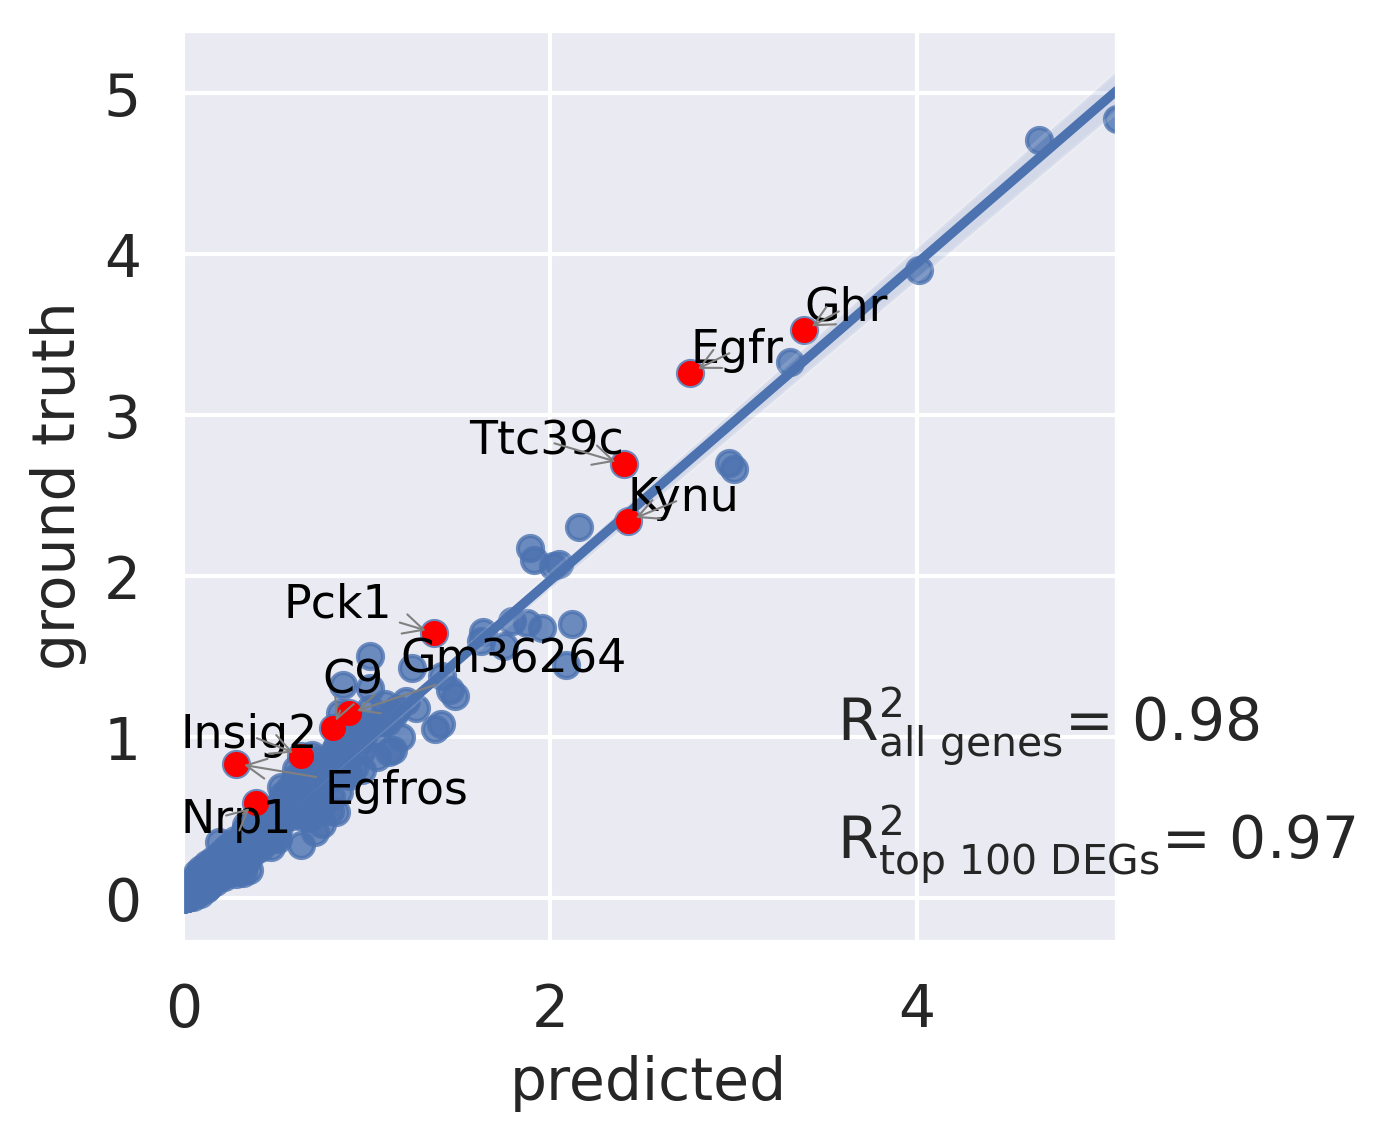

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 0.01 
 R2 All: 0.9998365886415364 
 R2 Top 100: 0.9996258058759293


... storing 'dose' as categorical


0.03


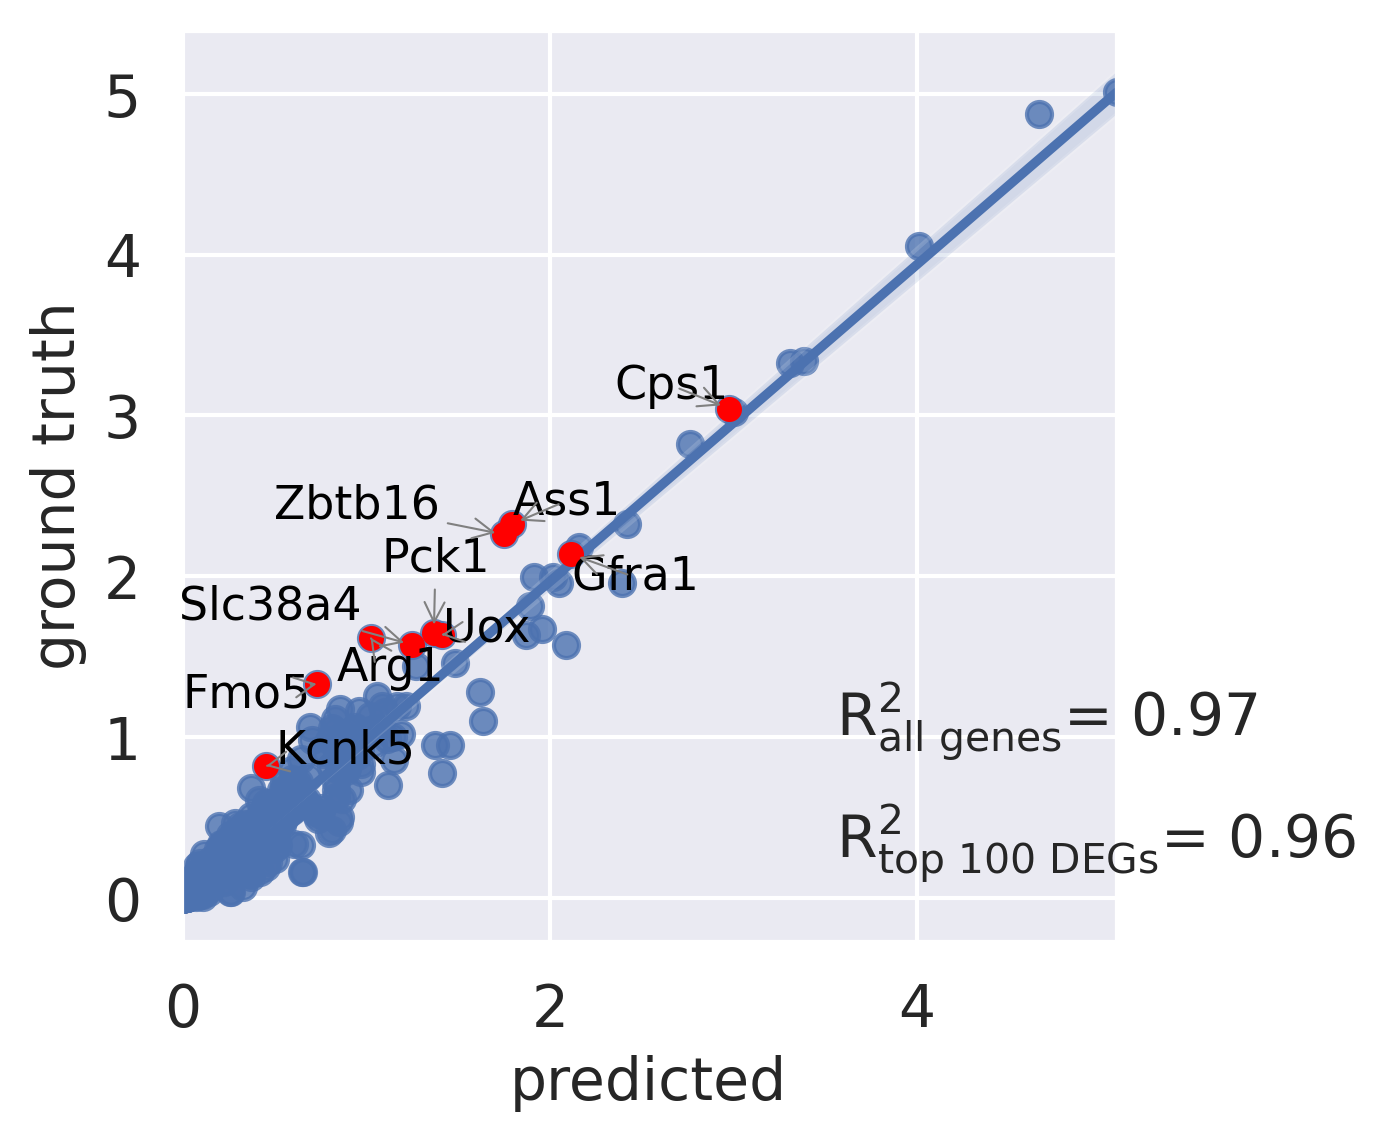

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 0.03 
 R2 All: 0.9994310986600337 
 R2 Top 100: 1.0036983240887611


... storing 'dose' as categorical


0.1


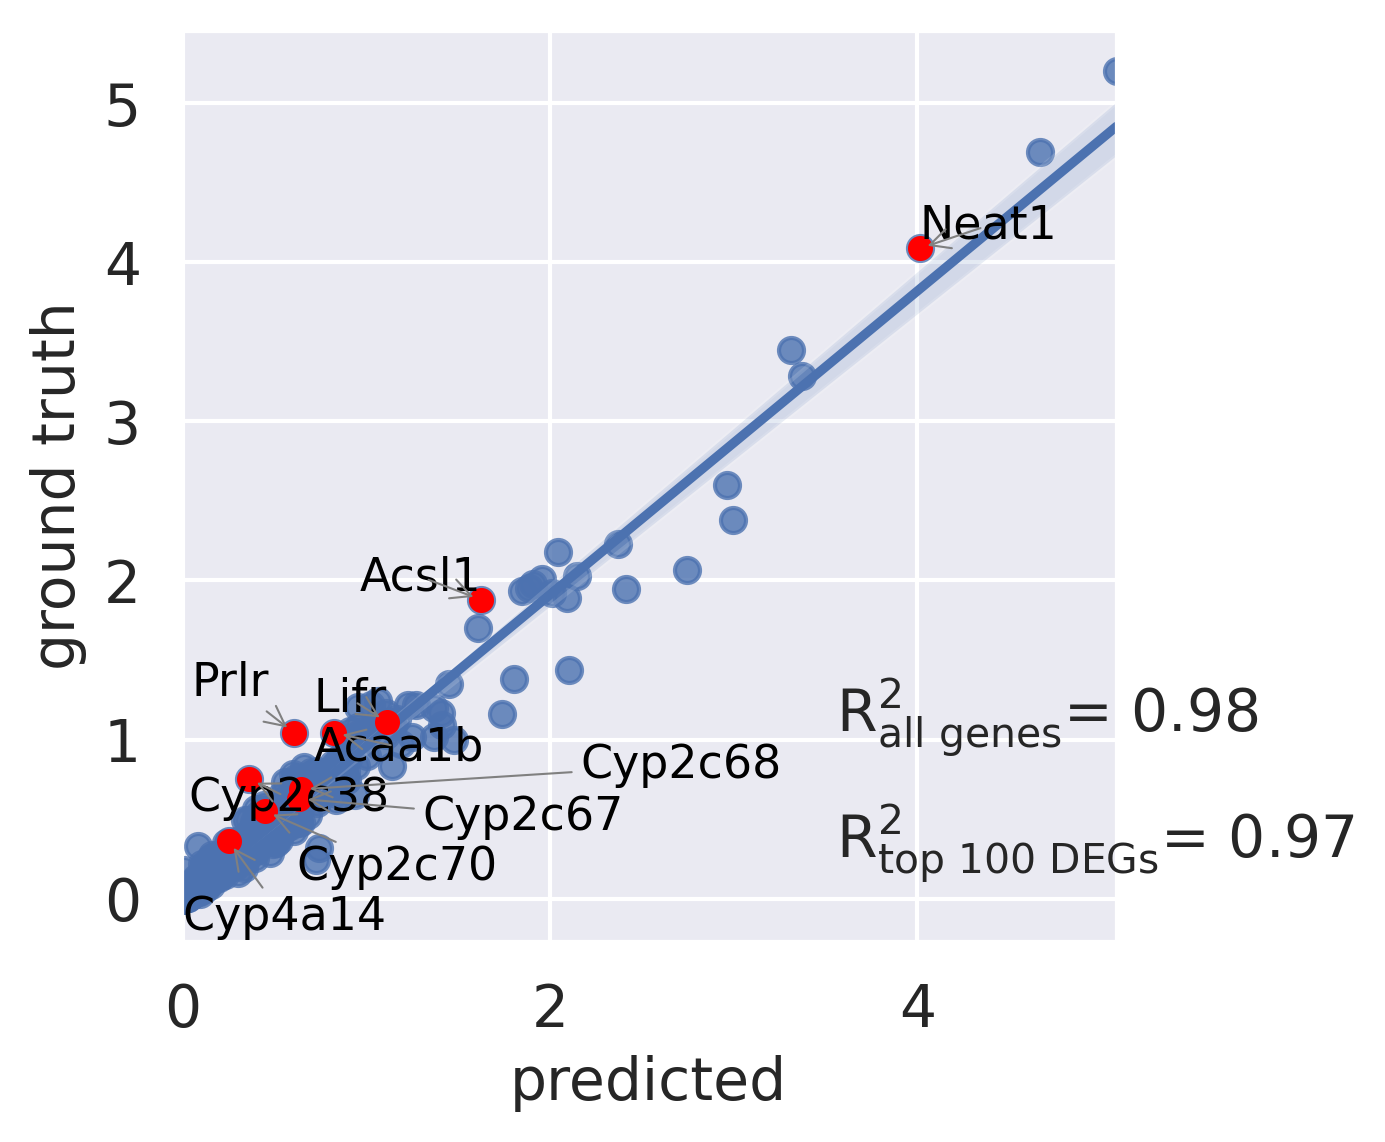

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 0.1 
 R2 All: 1.0017792971327764 
 R2 Top 100: 1.004977132859977


... storing 'dose' as categorical


0.3


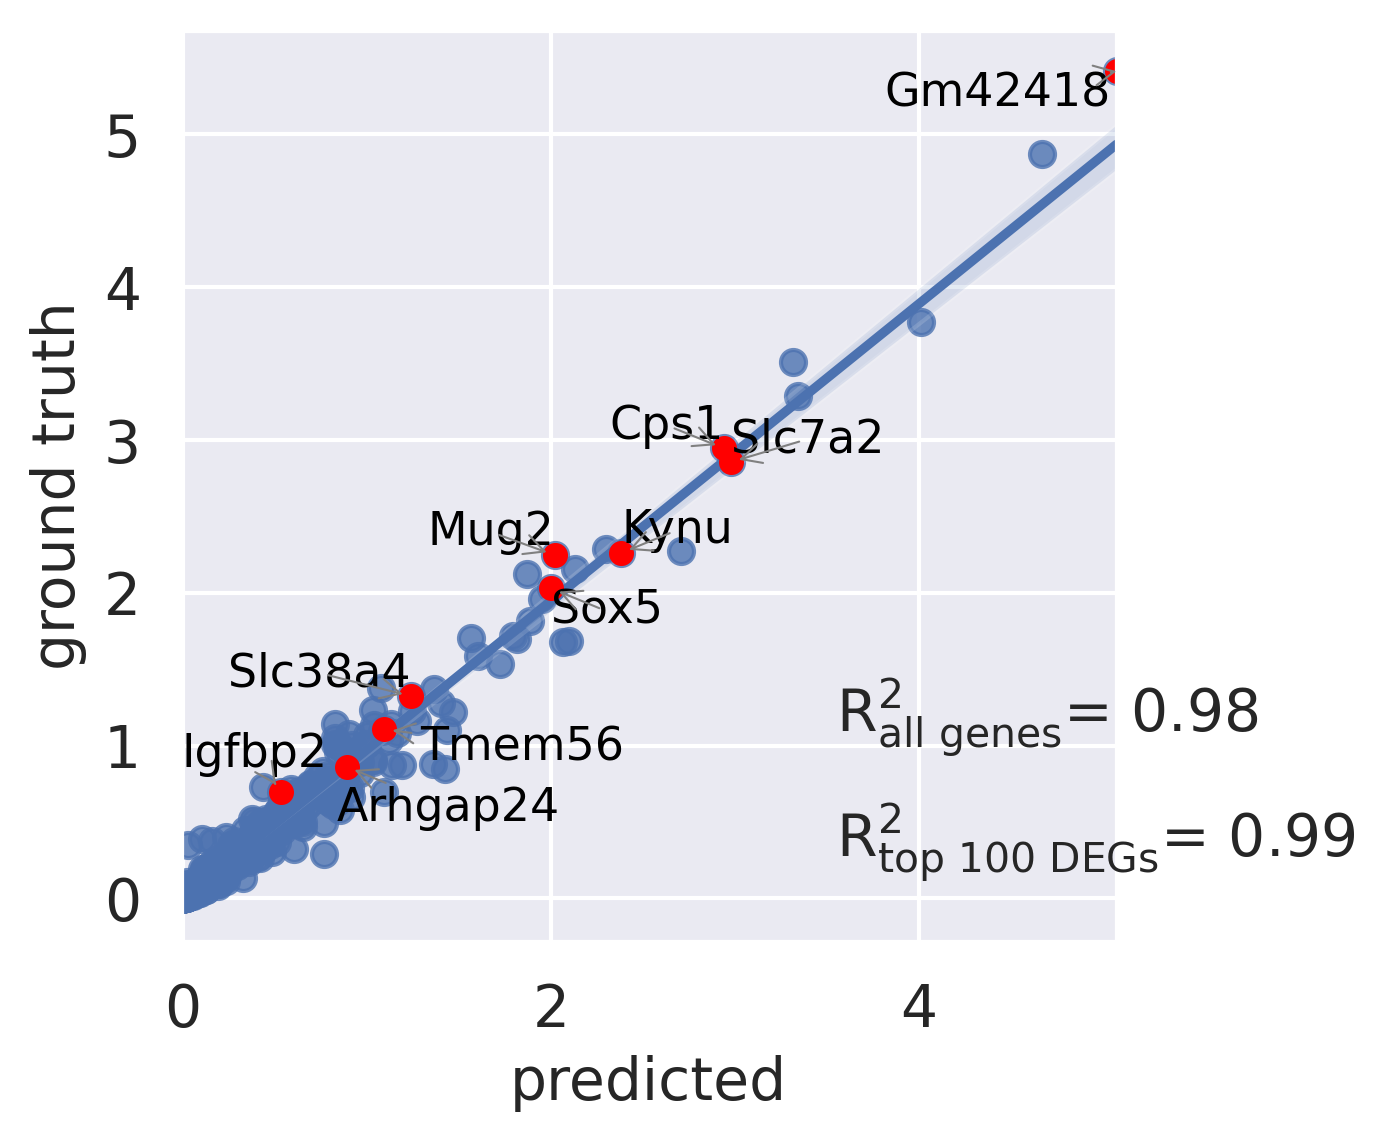

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 0.3 
 R2 All: 1.0005741023645782 
 R2 Top 100: 1.0003103972683154


... storing 'dose' as categorical


1.0


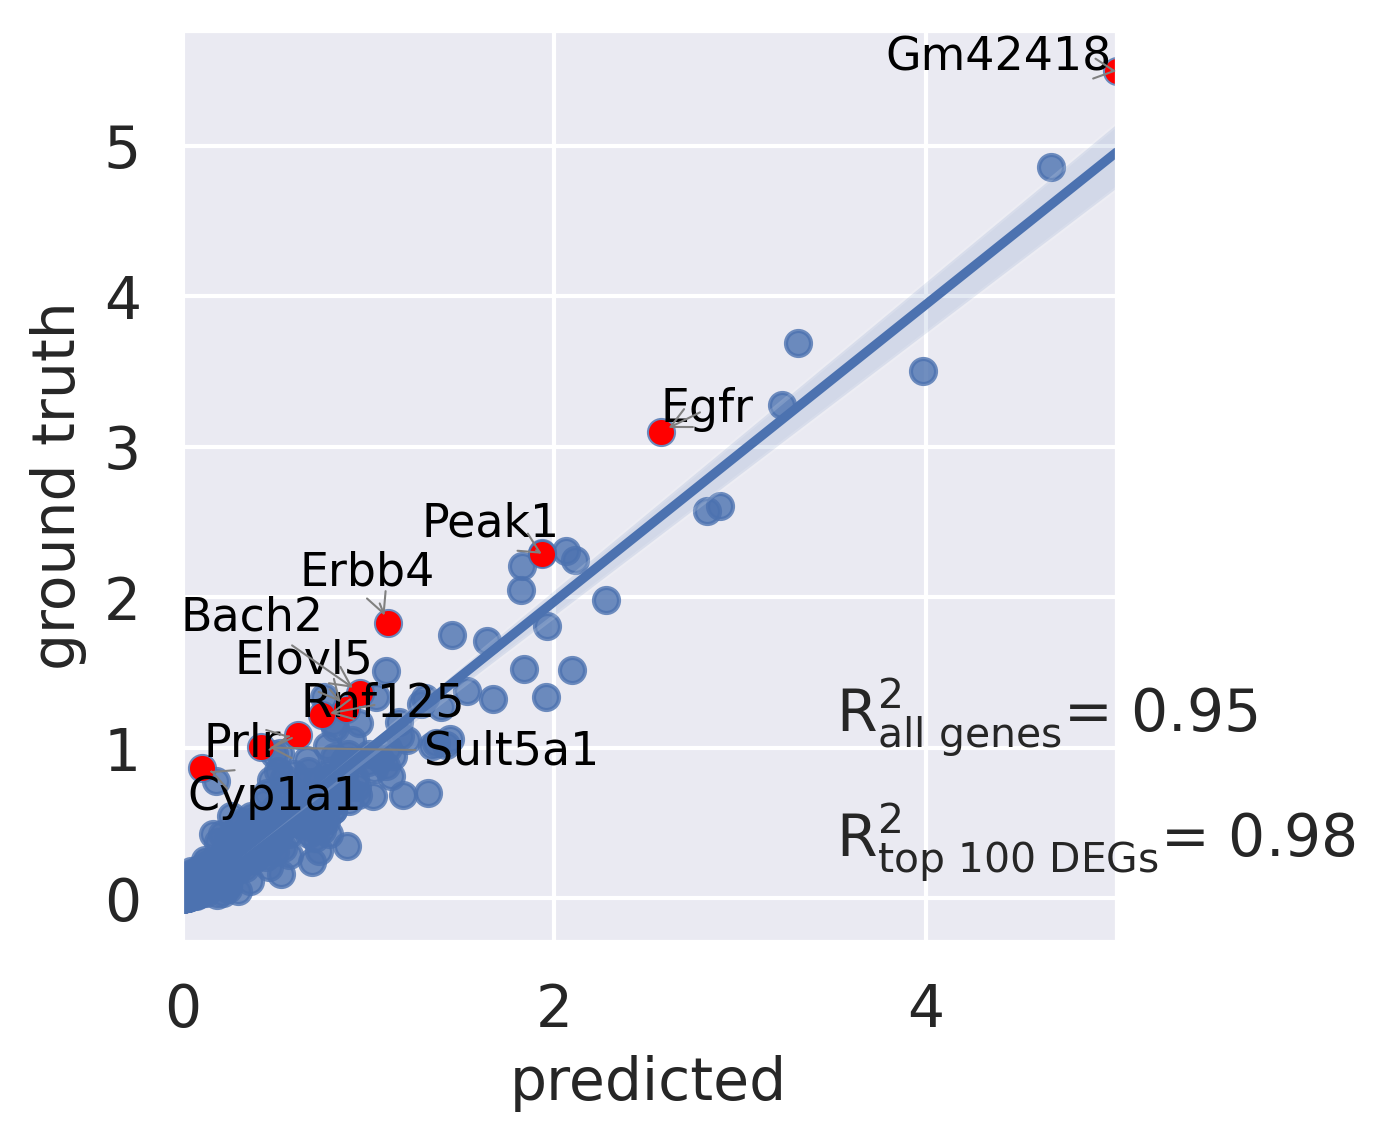

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 1.0 
 R2 All: 1.005549147681544 
 R2 Top 100: 1.016663184905941


... storing 'dose' as categorical


3.0


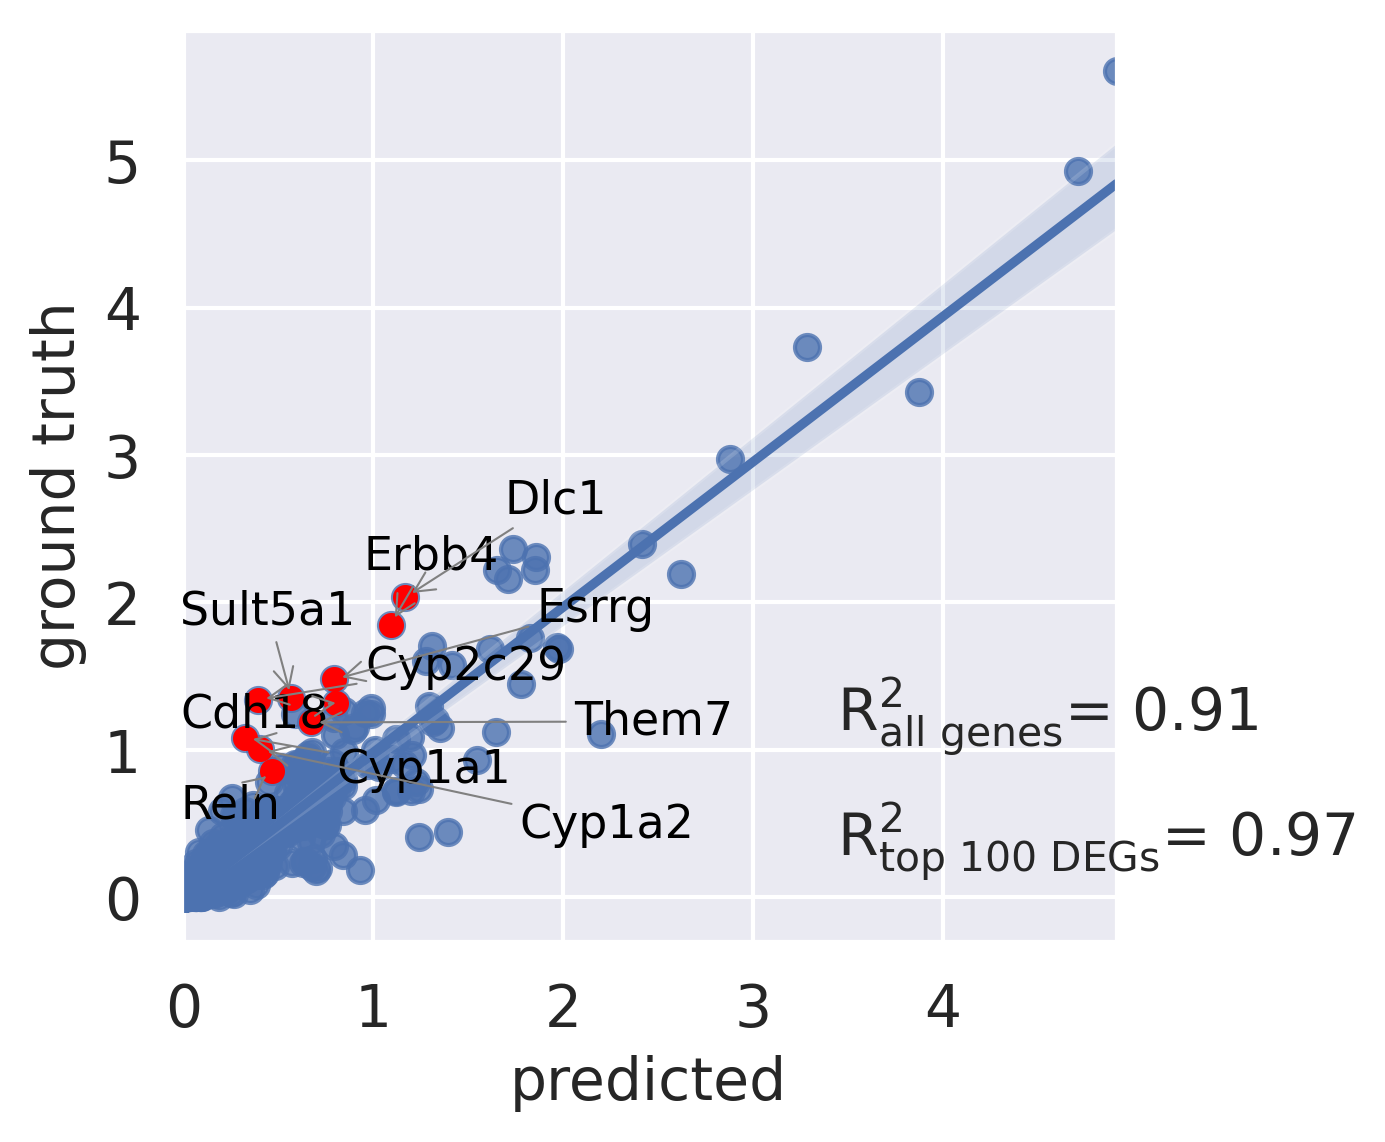

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 3.0 
 R2 All: 1.0401036100968821 
 R2 Top 100: 1.0038404243535974


... storing 'dose' as categorical


10.0


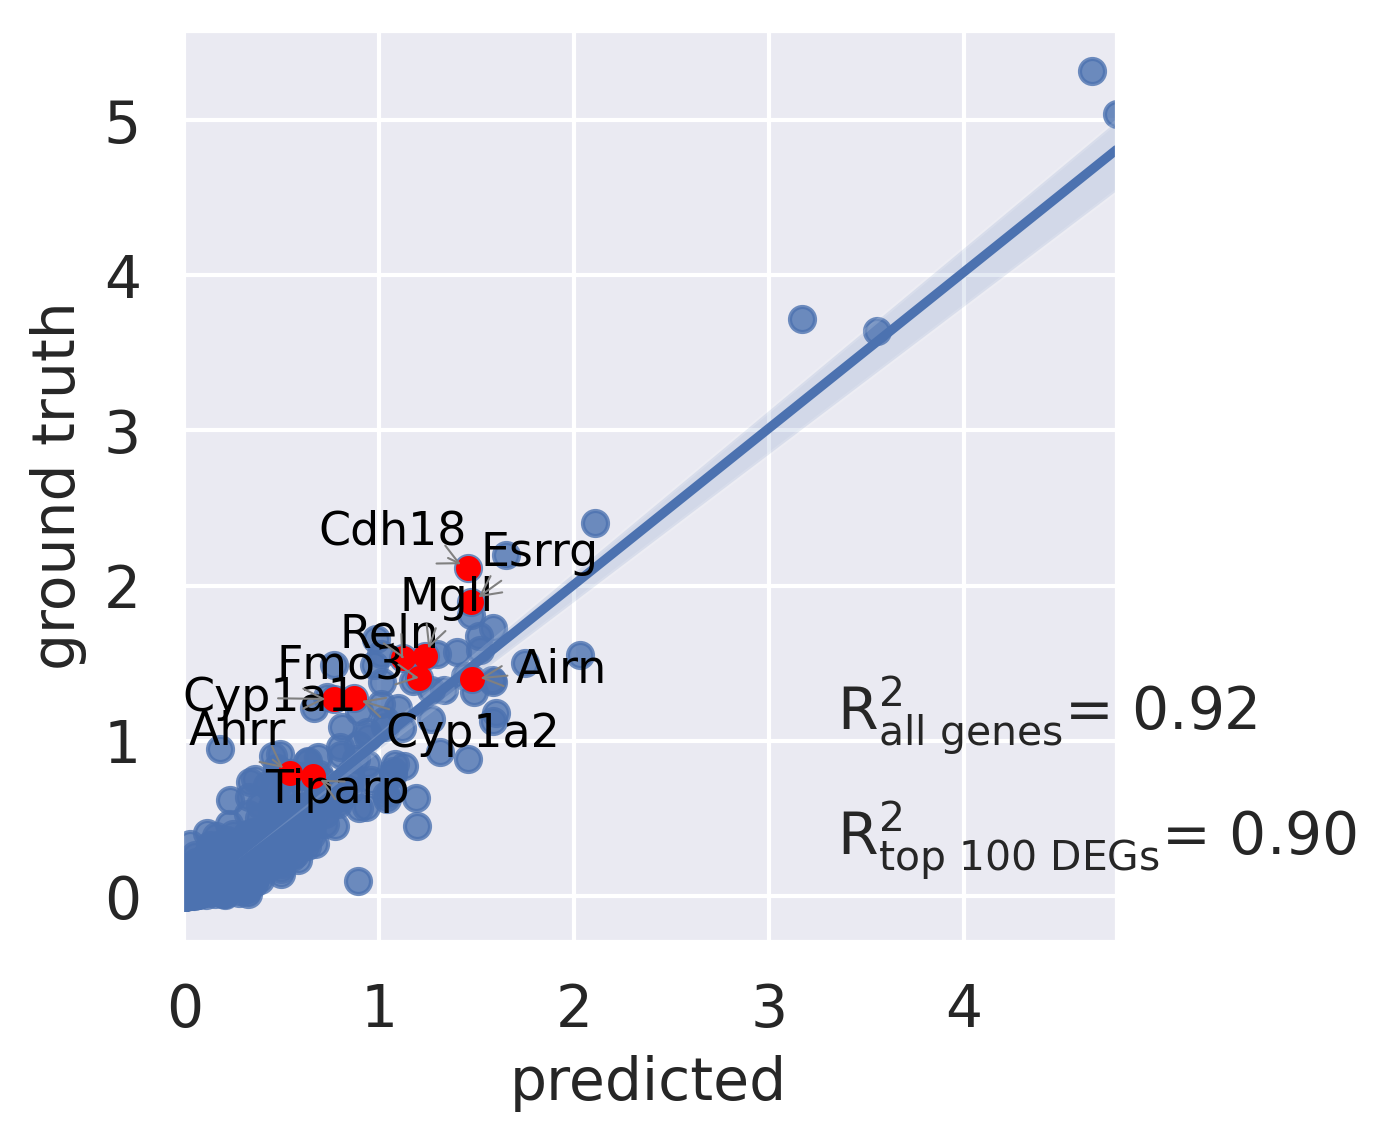

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 10.0 
 R2 All: 1.1961050842270327 
 R2 Top 100: 1.1112825896117045


... storing 'dose' as categorical


30.0


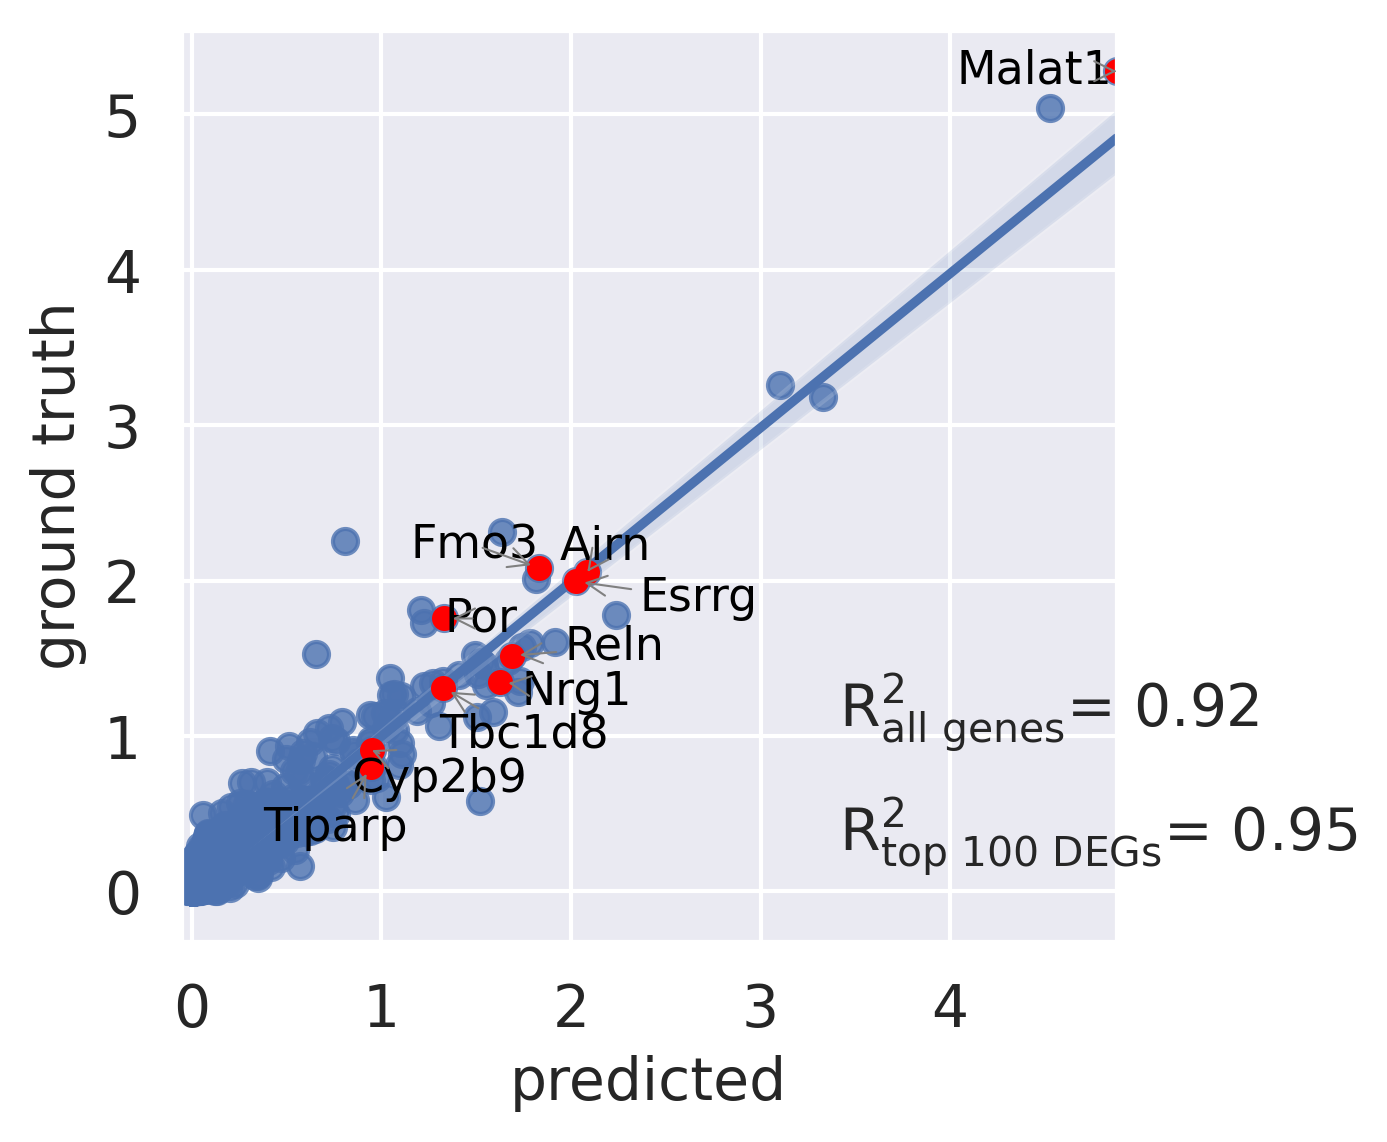

Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 30.0 
 R2 All: 1.465797262704612 
 R2 Top 100: 1.1896994357394821


In [6]:
#Regression   
regression = True
dr_dict, delta, reg = model.predict(
    ctrl_key='0.0',
    treat_key='30.0',
    cell_type_to_predict=cell,
    regression = regression,
    continuous = True,
    doses = doses)

for key in dr_dict.keys():
    dr_dict[key].obs["Dose"] = f'{key} VIDR'

ctrl_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == 0))]
eval_dict1 = {}

for d in doses[1:]:
    stim_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == d))]
    eval_dict1[d] = ctrl_adata.concatenate(stim_adata, dr_dict[d])
    eval_dict1[d].obs["dose"] = [str(i) if type(i) == float else i for i in eval_dict1[d].obs['Dose']]

for d in doses[1:]:
    cell_adata = adata[adata.obs["celltype"] ==cell]
    sc.tl.rank_genes_groups(cell_adata, groupby="dose", method="wilcoxon")
    diff_genes = cell_adata.uns["rank_genes_groups"]["names"][str(d)]
    print(f"{d}")
    r2_value1 = model.reg_mean_plot(
        eval_dict1[d],
        condition_key = "dose",
        cell_type_key = "celltype",
        axis_keys={"x": f"{d} VIDR", "y": f"{d}"},
        gene_list=diff_genes[:10],
        top_100_genes = diff_genes[:25],
        labels={"x": "predicted", "y": "ground truth"},
        path_to_save="./reg_mean1.pdf",
        show=True,
        legend=False)
    r2_value2 = model.reg_mean_plot(
        eval_dict1[d],
        condition_key = "dose",
        cell_type_key = "celltype",
        axis_keys={"x": f"0.0", "y": f"{d}"},
        gene_list=diff_genes[:10],
        top_100_genes = diff_genes[:25],
        labels={"x": "predicted", "y": "ground truth"},
        path_to_save="./figures/reg_mean1.pdf",
        show=False,
        legend=False)
    print(f"Model: {model_name}\n Cell: {cell}\n Regression: {regression} \n Dose: {d} \n R2 All: {r2_value1[0]/r2_value2[0]} \n R2 Top 100: {r2_value1[1]/r2_value2[1]}")

In [29]:
latent_X = model.get_latent_representation(adata)
latent_adata = sc.AnnData(X = latent_X, obs = adata.obs.copy())
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 103745 cells, 5000 vars, 9        
         batches, 6 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
         Falling back to preprocessing with `sc.pp.pca` and default params.


In [30]:
latent_adata.obs["Training Split"] = ["Test" if ((i == "Hepatocytes - portal") & (j > 0)) else "Train" for (i, j) in zip(latent_adata.obs["celltype"], latent_adata.obs["Dose"])]
latent_adata.obs["Dose"] = [float(i) for i in latent_adata.obs["dose"]]
latent_adata.obs["Cell Type"] = latent_adata.obs["celltype"]
latent_adata.obs["cell_dose"] = [f"{j}_{str(i)}" for (i,j) in zip(latent_adata.obs["Dose"], latent_adata.obs["celltype"])]

In [31]:
centroids = {cell:np.average(latent_adata.obsm["X_umap"][latent_adata.obs["cell_dose"] == cell], axis = 0) for cell in np.unique(latent_adata.obs["cell_dose"])}
centroids["0"] = np.average(latent_adata.obsm["X_umap"][latent_adata.obs["dose"] == "0.0"], axis = 0)
centroids["30"] = np.average(latent_adata.obsm["X_umap"][latent_adata.obs["dose"] == "30.0"], axis = 0)

## Figure 3A

... storing 'dose' as categorical
... storing 'Training Split' as categorical
... storing 'cell_dose' as categorical


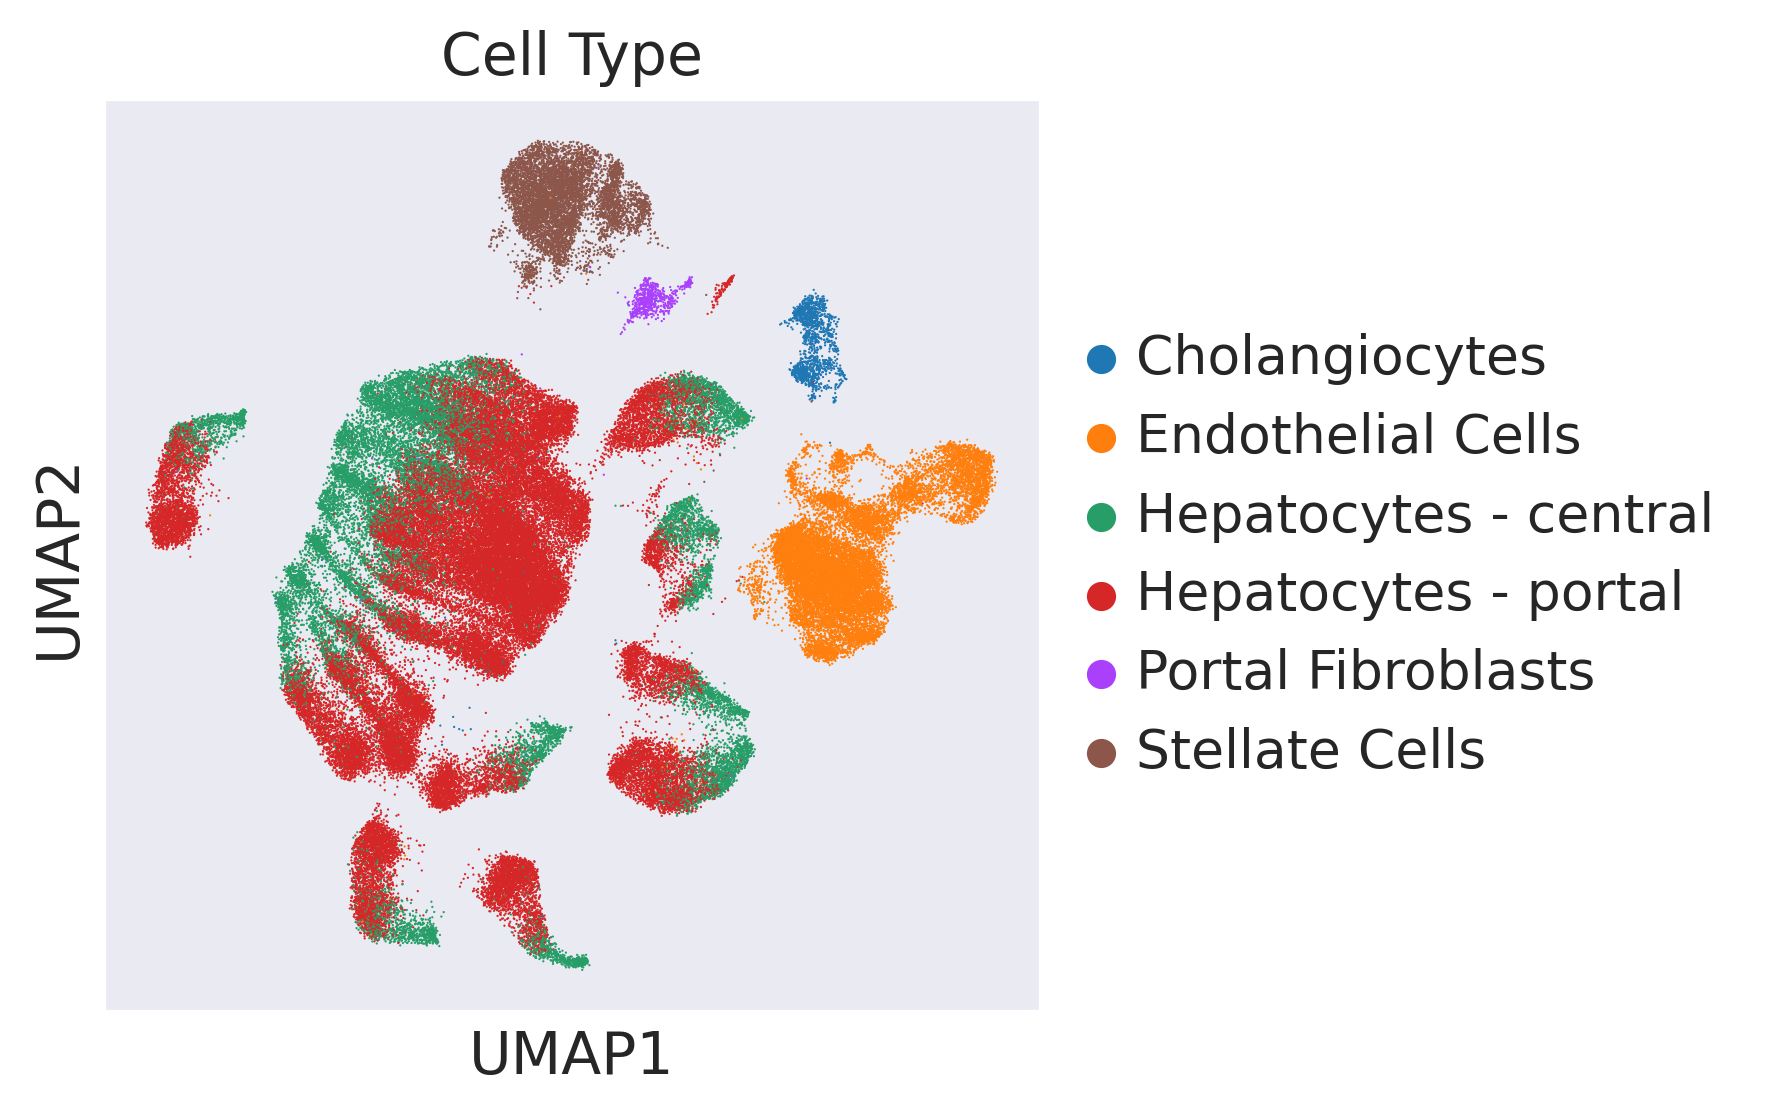

In [32]:
sc.pl.umap(latent_adata, color = ["Cell Type"], frameon=True, save ="3A1.svg")

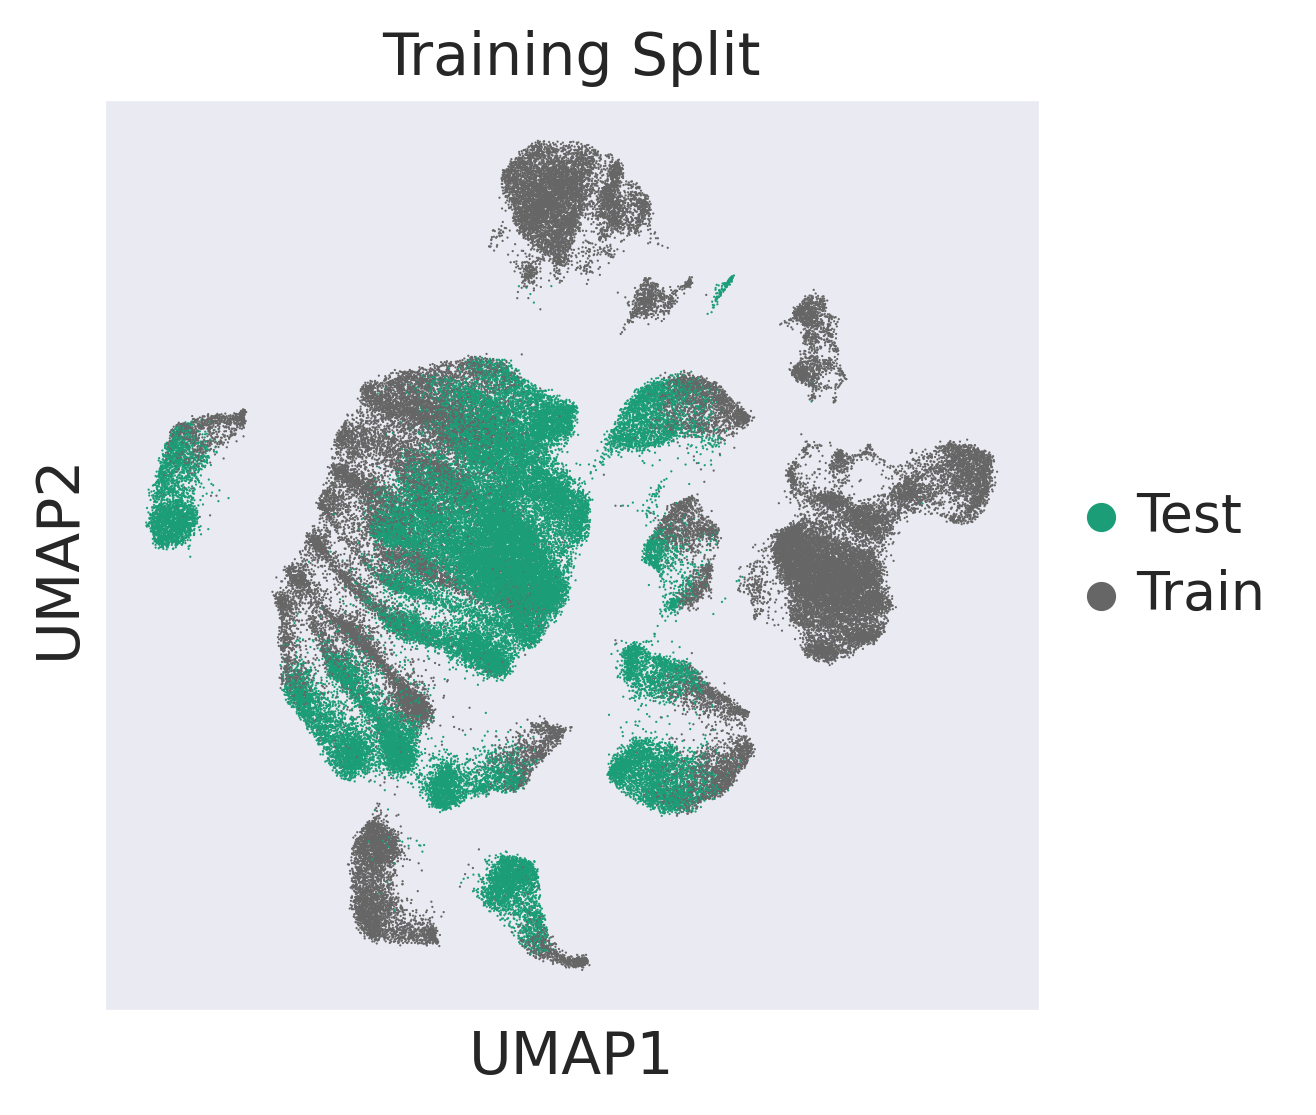

In [33]:
sc.pl.umap(latent_adata, color = ["Training Split"], frameon=True,  palette= "Dark2", save = "3A2.svg")

In [34]:
from matplotlib import cm

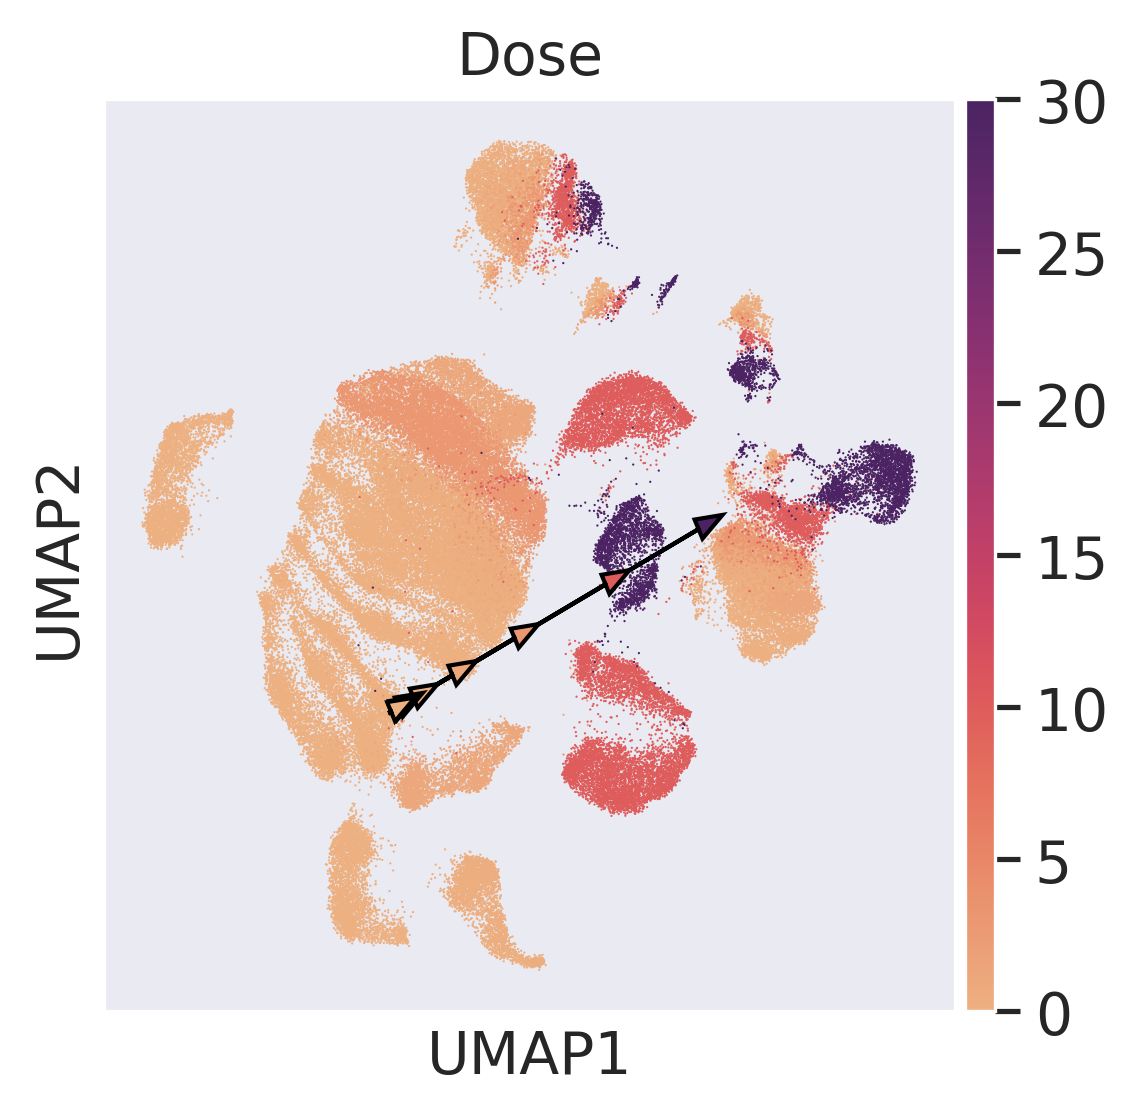

In [35]:
umap_delta = centroids["30"]- centroids["0"]
ax =sc.pl.umap(latent_adata, color = ["Dose"], frameon=True, return_fig = True, cmap = "flare")
x = [i/30 for i in doses[::-1][:-1]]
colors = cm.get_cmap(sns.cm.flare)(x)[np.newaxis, :, :3]
for d, c in zip(doses[::-1][:-1], colors[0]):
    plt.arrow(centroids["Hepatocytes - portal_0.0"][0], centroids["Hepatocytes - portal_0.0"][1], umap_delta[0]*(np.log1p(d)/np.log1p(30)), umap_delta[1]*(np.log1p(d)/np.log1p(30)), head_width = 0.7, edgecolor = "black", facecolor = c)
plt.savefig("../figures/3A3.svg", bbox_inches='tight')
plt.show()

In [22]:
# df_list = []
# celltypes = np.unique(adata.obs["celltype"])
# regression = False
# for cell in celltypes:
#     print(cell)
#     train_adata, test_adata = prepare_cont_data(adata, "celltype", "dose", "Dose", cell, 0, normalized=True)

#     model = VIDR(train_adata, linear_decoder = False)
# #     model.train(
# #     max_epochs=100,
# #     batch_size=128,
# #     early_stopping=True,
# #     early_stopping_patience=25)
    
# #     model.save(f"../../data/VAE_Binary_Prediction_Dioxin_5000g_{cell}.pt")
#     model = model.load(f"../../data/VAE_Cont_Prediction_Dioxin_5000g_{cell}.pt/", train_adata)
    
#     model_name = "VAEArith"
        
#     dr_dict, delta = model.predict(
#         ctrl_key='0.0',
#         treat_key='30.0',
#         cell_type_to_predict=cell,
#         regression = regression,
#         continuous = True,
#         doses = doses)
#     for key in dr_dict.keys():
#         dr_dict[key].obs["Dose"] = f'{key} VAEArith'

#     ctrl_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == 0))]
#     eval_dict1 = {}

#     for d in doses[1:]:
#         stim_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == d))]
#         eval_dict1[d] = ctrl_adata.concatenate(stim_adata, dr_dict[d])
#         eval_dict1[d].obs["dose"] = [str(i) if type(i) == float else i for i in eval_dict1[d].obs['Dose']]

#     for d in doses[1:]:
#         cell_adata = adata[adata.obs["celltype"] ==cell]
#         sc.tl.rank_genes_groups(cell_adata, groupby="dose", method="wilcoxon")
#         diff_genes = cell_adata.uns["rank_genes_groups"]["names"][str(d)]
    
#         r2_df = calculate_r2_multidose(
#             eval_dict1[d], 
#             cell,
#             model_name, 
#             "dose", 
#             {"x":f'{d} VAEArith', "y":f"{d}"}, 
#             diff_genes=diff_genes[:100], 
#             random_sample_coef = 0.8,
#             n_iter = 500
#         )
#         df_list.append(r2_df)

In [23]:
# celltypes = np.unique(adata.obs["celltype"])
# regression = True
# for cell in celltypes:
#     print(cell)
#     train_adata, test_adata = prepare_cont_data(adata, "celltype", "dose", "Dose", cell, 0, normalized=True)

#     model = VIDR(train_adata, linear_decoder = False)
# #     model.train(
# #     max_epochs=100,
# #     batch_size=128,
# #     early_stopping=True,
# #     early_stopping_patience=25)
    
# #     model.save(f"../../data/VAE_Binary_Prediction_Dioxin_5000g_{cell}.pt")
#     model = model.load(f"../../data/VAE_Cont_Prediction_Dioxin_5000g_{cell}.pt/", train_adata)
    
#     model_name = "scVIDR"
        
#     dr_dict, delta, reg = model.predict(
#         ctrl_key='0.0',
#         treat_key='30.0',
#         cell_type_to_predict=cell,
#         regression = regression,
#         continuous = True,
#         doses = doses)
#     for key in dr_dict.keys():
#         dr_dict[key].obs["Dose"] = f'{key} VAEArith'

#     ctrl_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == 0))]
#     eval_dict1 = {}

#     for d in doses[1:]:
#         stim_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == d))]
#         eval_dict1[d] = ctrl_adata.concatenate(stim_adata, dr_dict[d])
#         eval_dict1[d].obs["dose"] = [str(i) if type(i) == float else i for i in eval_dict1[d].obs['Dose']]

#     for d in doses[1:]:
#         cell_adata = adata[adata.obs["celltype"] ==cell]
#         sc.tl.rank_genes_groups(cell_adata, groupby="dose", method="wilcoxon")
#         diff_genes = cell_adata.uns["rank_genes_groups"]["names"][str(d)]
    
#         r2_df = calculate_r2_multidose(
#             eval_dict1[d], 
#             cell,
#             model_name, 
#             "dose", 
#             {"x":f'{d} VAEArith', "y":f"{d}"}, 
#             diff_genes=diff_genes[:100], 
#             random_sample_coef = 0.8,
#             n_iter = 500
#         )
#         df_list.append(r2_df)

In [24]:
# r2_values_allCells_df = pd.concat(df_list)

In [70]:
# r2_values_allCells_df.to_csv("../../data/Continuous_Comparison_r2Values.csv")

In [36]:
r2_values_allCells_df = pd.read_csv("../data/Continuous_Comparison_r2Values.csv")

In [37]:
r2_values_allCells_df["Dose"] = r2_values_allCells_df["Dose"].astype("str")

## Figure 3B

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.03_scVIDR vs. 0.03_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=9.600e+04
0.01_scVIDR vs. 0.01_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=8.816e+04
0.1_scVIDR vs. 0.1_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=6.304e+04
0.3_scVIDR vs. 0.3_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=1.015e+05
1.0_scVIDR vs. 1.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:7.095e-83 U_stat=2.129e+05
3.0_scVIDR vs. 3.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:3.109e-165 U_stat=2.500e+05
10.0_scVIDR vs. 10.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:2.928e-165 U_stat=2.500e+05
30.0_scVIDR vs. 30.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:2.928e-165 U_stat=2.500e+05


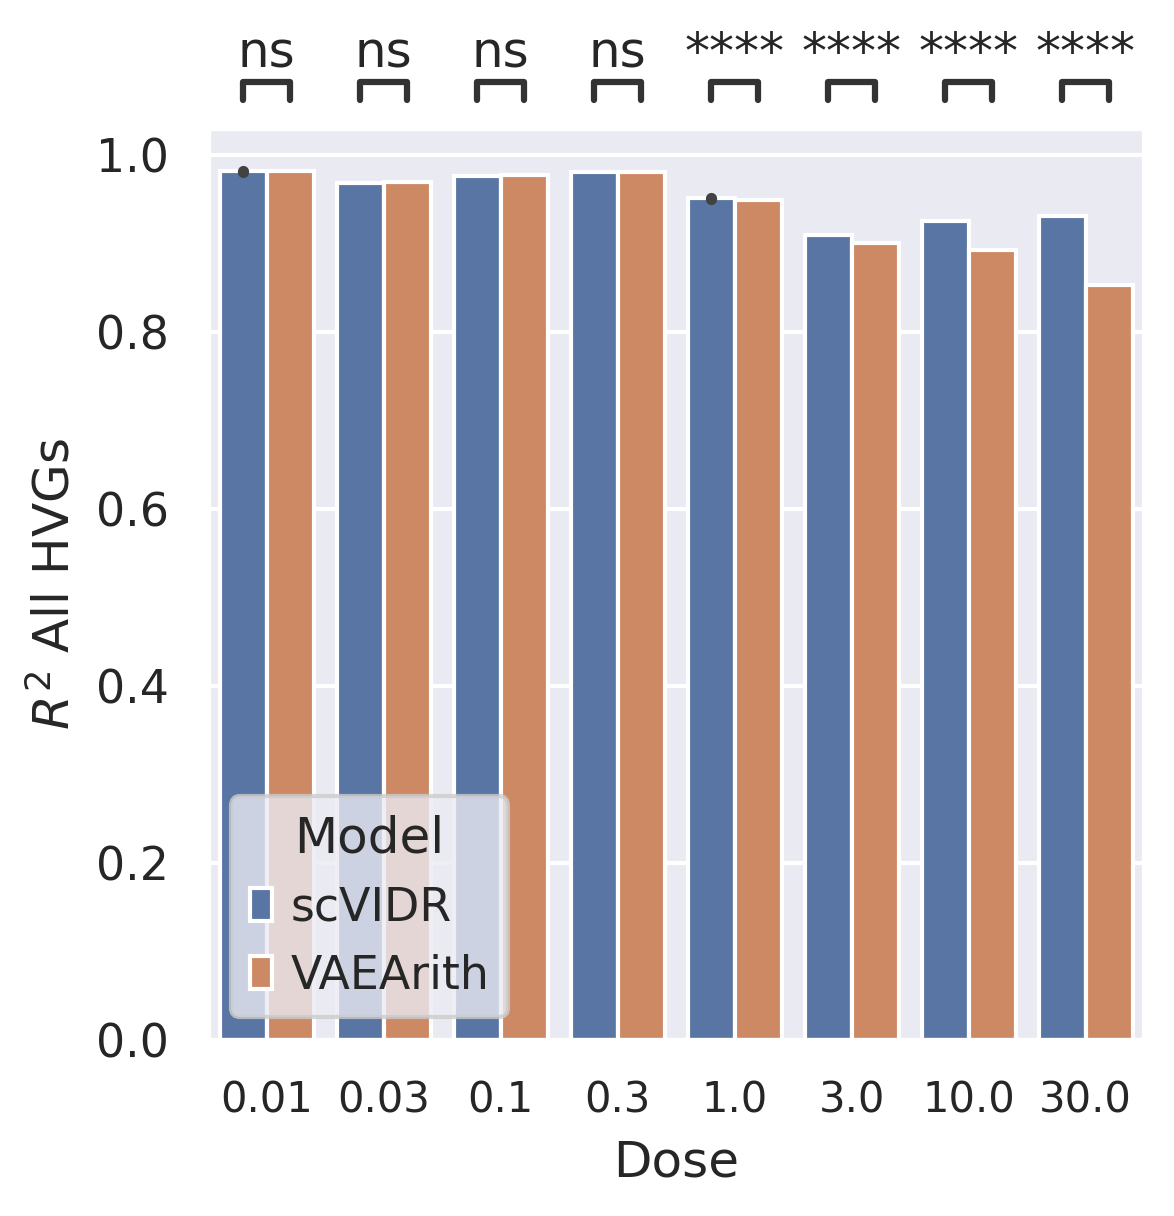

In [16]:
cell = "Hepatocytes - portal"
df = r2_values_allCells_df.loc[((r2_values_allCells_df["Cell"].values == cell) & 
                                (r2_values_allCells_df["Gene Set"] == "All HVGs"))]
order = [str(i) for i in doses][1:]
hue_order = ['scVIDR', 'VAEArith']
ax = sns.barplot(x = "Dose", y = "R^2",  data = df, hue = "Model", order = order, hue_order = hue_order)
pairs = [
    (("0.01", "scVIDR"),("0.01", "VAEArith")),
    (("0.03", "scVIDR"),("0.03", "VAEArith")),
    (("0.1", "scVIDR"),("0.1", "VAEArith")),
    (("0.3", "scVIDR"),("0.3", "VAEArith")),
    (("1.0", "scVIDR"),("1.0", "VAEArith")),
    (("3.0", "scVIDR"),("3.0", "VAEArith")),
    (("10.0", "scVIDR"),("10.0", "VAEArith")),
    (("30.0", "scVIDR"),("30.0", "VAEArith"))
]
annotator = Annotator(ax, pairs, data=df, x="Dose", y="R^2", hue = "Model", order = order, hue_order=hue_order)
annotator.configure(test='Mann-Whitney-gt', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.xticks(fontsize = 10)
plt.ylabel(r"$R^2$ All HVGs")
plt.savefig("../figures/3B1.svg")
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.03_scVIDR vs. 0.03_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=1.053e+05
0.01_scVIDR vs. 0.01_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=6.812e+04
0.1_scVIDR vs. 0.1_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.000e+00 U_stat=6.914e+04
0.3_scVIDR vs. 0.3_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:2.868e-02 U_stat=1.337e+05
1.0_scVIDR vs. 1.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.135e-162 U_stat=2.490e+05
3.0_scVIDR vs. 3.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:2.928e-165 U_stat=2.500e+05
10.0_scVIDR vs. 10.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:2.928e-165 U_stat=2.500e+05
30.0_scVIDR vs. 30.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:7.951e-145 U_stat=2.419e+05


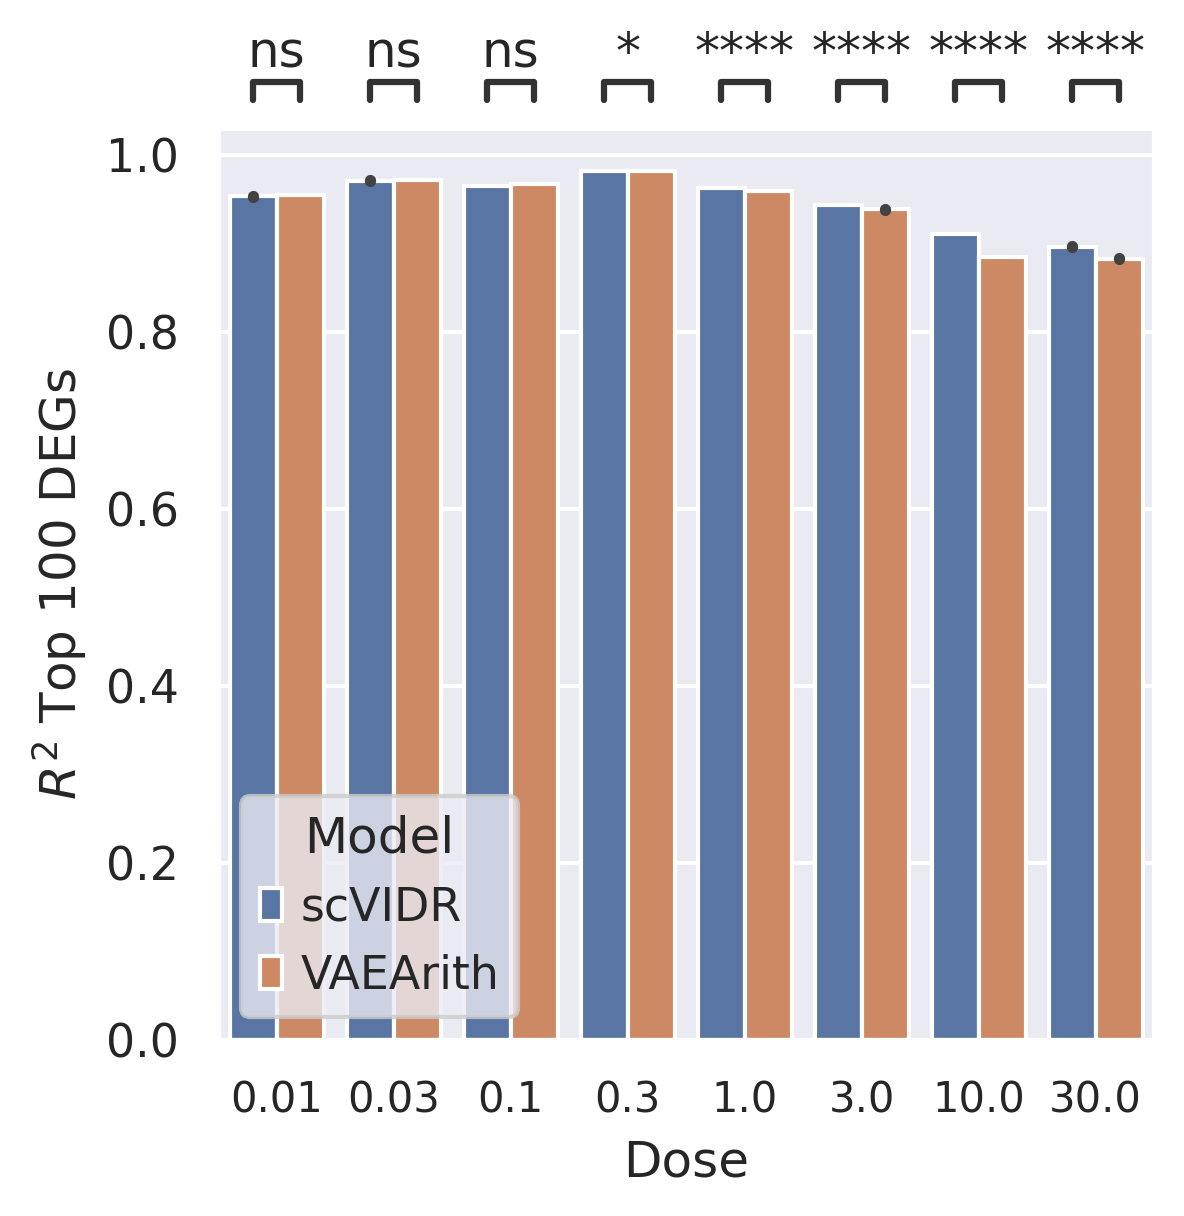

In [17]:
cell = "Hepatocytes - portal"
df = r2_values_allCells_df.loc[((r2_values_allCells_df["Cell"].values == cell) & 
                                (r2_values_allCells_df["Gene Set"] == "DEGs"))]
order = [str(i) for i in doses][1:]
hue_order = ['scVIDR', 'VAEArith']
ax = sns.barplot(x = "Dose", y = "R^2",  data = df, hue = "Model", order = order, hue_order = hue_order)
pairs = [
    (("0.01", "scVIDR"),("0.01", "VAEArith")),
    (("0.03", "scVIDR"),("0.03", "VAEArith")),
    (("0.1", "scVIDR"),("0.1", "VAEArith")),
    (("0.3", "scVIDR"),("0.3", "VAEArith")),
    (("1.0", "scVIDR"),("1.0", "VAEArith")),
    (("3.0", "scVIDR"),("3.0", "VAEArith")),
    (("10.0", "scVIDR"),("10.0", "VAEArith")),
    (("30.0", "scVIDR"),("30.0", "VAEArith"))
]
annotator = Annotator(ax, pairs, data=df, x="Dose", y="R^2", hue = "Model", order = order, hue_order=hue_order)
annotator.configure(test='Mann-Whitney-gt', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.xticks(fontsize = 10)
plt.ylabel(r"$R^2$ Top 100 DEGs")
plt.savefig("../figures/3B2.svg")
plt.show()

## Figure 3D

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.03_scVIDR vs. 0.03_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:4.369e-01 U_stat=4.511e+06
0.01_scVIDR vs. 0.01_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.644e-01 U_stat=4.566e+06
0.1_scVIDR vs. 0.1_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:3.197e-01 U_stat=4.531e+06
0.3_scVIDR vs. 0.3_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:4.598e-01 U_stat=4.507e+06
1.0_scVIDR vs. 1.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:9.423e-03 U_stat=4.658e+06
3.0_scVIDR vs. 3.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:8.439e-02 U_stat=4.592e+06
10.0_scVIDR vs. 10.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:3.547e-213 U_stat=6.589e+06
30.0_scVIDR vs. 30.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:4.495e-244 U_stat=6.737e+06


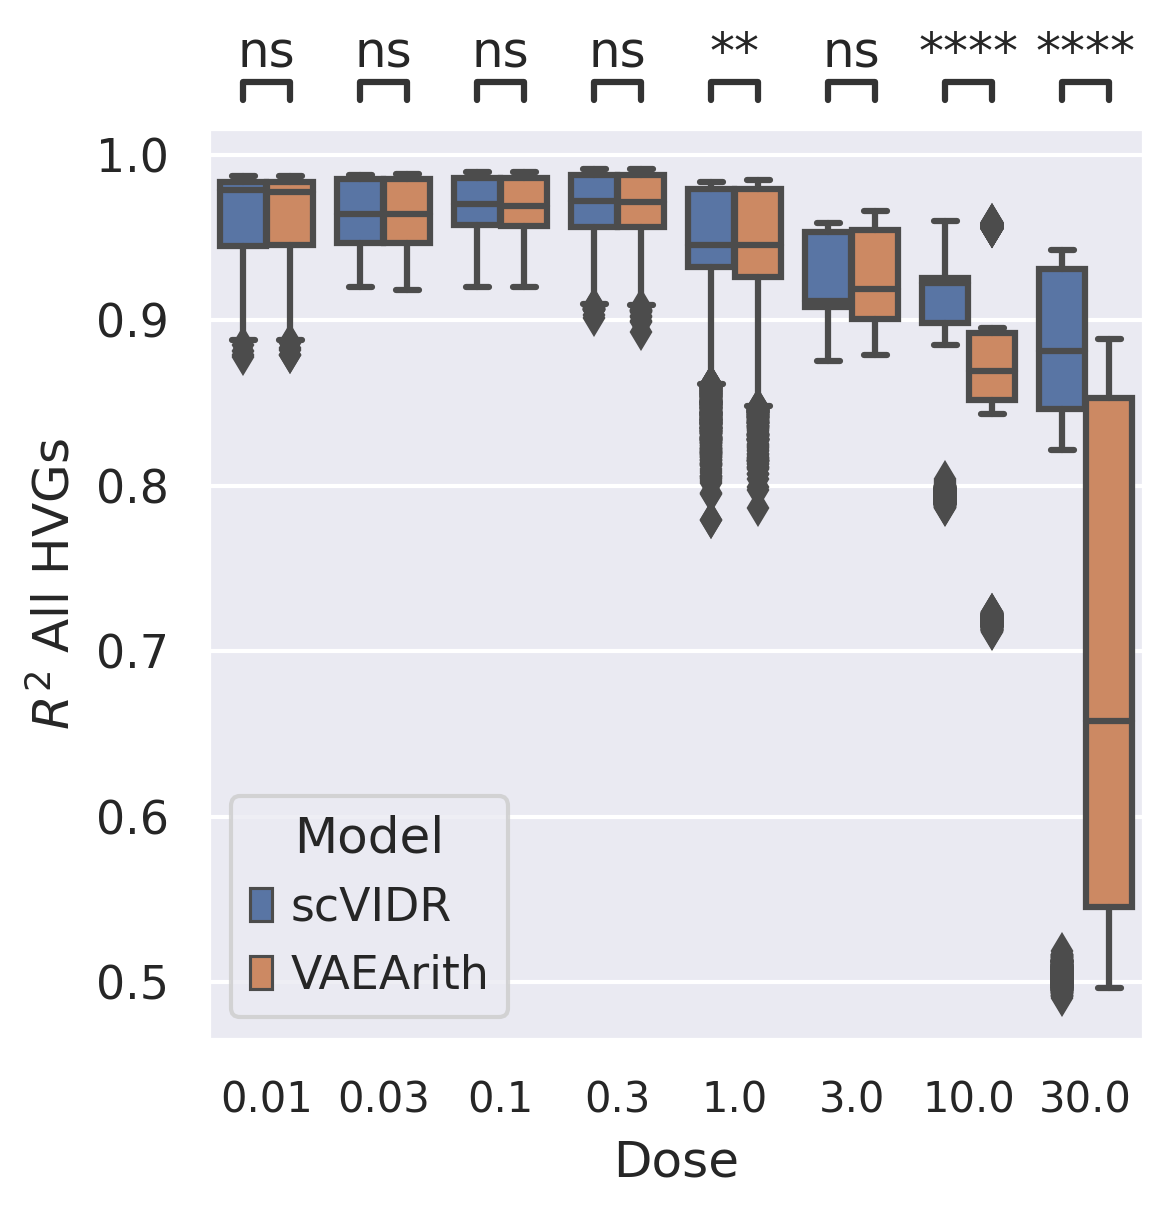

In [18]:
df = r2_values_allCells_df.loc[(r2_values_allCells_df["Gene Set"] == "All HVGs")]
order = [str(i) for i in doses][1:]
hue_order = ['scVIDR', 'VAEArith']
ax = sns.boxplot(x = "Dose", y = "R^2",  data = df, hue = "Model", order = order, hue_order = hue_order)
pairs = [
    (("0.01", "scVIDR"),("0.01", "VAEArith")),
    (("0.03", "scVIDR"),("0.03", "VAEArith")),
    (("0.1", "scVIDR"),("0.1", "VAEArith")),
    (("0.3", "scVIDR"),("0.3", "VAEArith")),
    (("1.0", "scVIDR"),("1.0", "VAEArith")),
    (("3.0", "scVIDR"),("3.0", "VAEArith")),
    (("10.0", "scVIDR"),("10.0", "VAEArith")),
    (("30.0", "scVIDR"),("30.0", "VAEArith"))
]
annotator = Annotator(ax, pairs, data=df, x="Dose", y="R^2", hue = "Model", order = order, hue_order=hue_order)
annotator.configure(test='Mann-Whitney-gt', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.xticks(fontsize = 10)
plt.ylabel(r"$R^2$ All HVGs")
plt.savefig("../figures/3D1.svg")
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.03_scVIDR vs. 0.03_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:4.810e-01 U_stat=4.503e+06
0.01_scVIDR vs. 0.01_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:6.014e-03 U_stat=4.668e+06
0.1_scVIDR vs. 0.1_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:4.507e-01 U_stat=4.508e+06
0.3_scVIDR vs. 0.3_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:4.661e-01 U_stat=4.506e+06
1.0_scVIDR vs. 1.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:4.817e-05 U_stat=4.762e+06
3.0_scVIDR vs. 3.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:8.736e-12 U_stat=4.951e+06
10.0_scVIDR vs. 10.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:1.347e-141 U_stat=6.198e+06
30.0_scVIDR vs. 30.0_VAEArith: Mann-Whitney-Wilcoxon test greater, P_val:3.526e-127 U_stat=6.108e+06


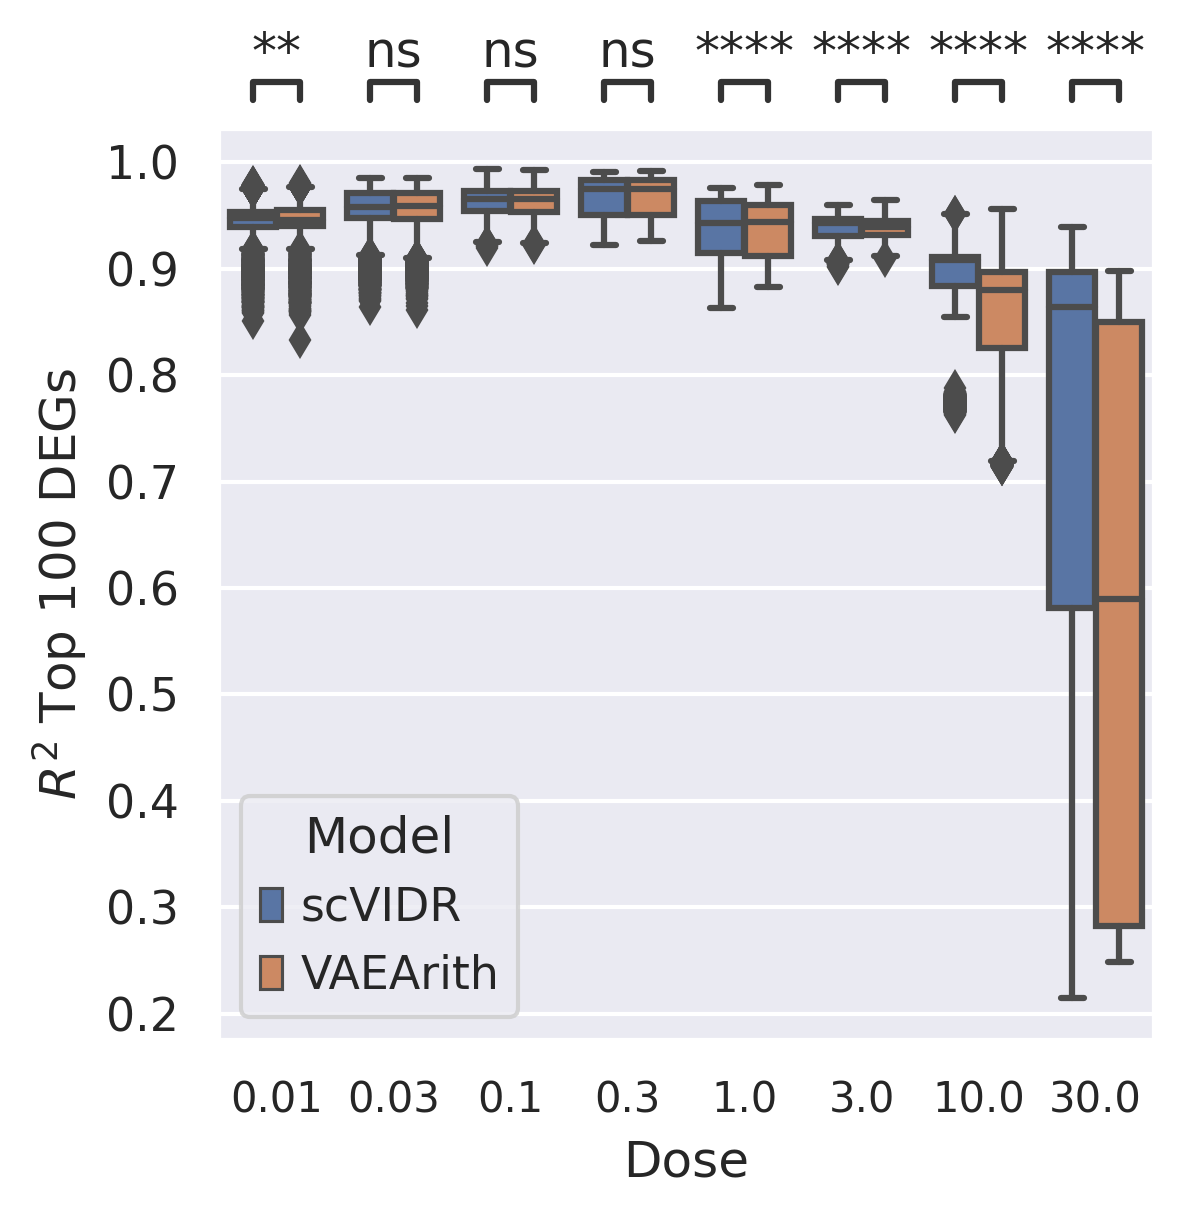

In [19]:
df = r2_values_allCells_df.loc[(r2_values_allCells_df["Gene Set"] == "DEGs")]
order = [str(i) for i in doses][1:]
hue_order = ['scVIDR', 'VAEArith']
ax = sns.boxplot(x = "Dose", y = "R^2",  data = df, hue = "Model", order = order, hue_order = hue_order)
pairs = [
    (("0.01", "scVIDR"),("0.01", "VAEArith")),
    (("0.03", "scVIDR"),("0.03", "VAEArith")),
    (("0.1", "scVIDR"),("0.1", "VAEArith")),
    (("0.3", "scVIDR"),("0.3", "VAEArith")),
    (("1.0", "scVIDR"),("1.0", "VAEArith")),
    (("3.0", "scVIDR"),("3.0", "VAEArith")),
    (("10.0", "scVIDR"),("10.0", "VAEArith")),
    (("30.0", "scVIDR"),("30.0", "VAEArith"))
]
annotator = Annotator(ax, pairs, data=df, x="Dose", y="R^2", hue = "Model", order = order, hue_order=hue_order)
annotator.configure(test='Mann-Whitney-gt', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.xticks(fontsize = 10)
plt.ylabel(r"$R^2$ Top 100 DEGs")
plt.savefig("../figures/3D2.svg")
plt.show()

## Figure 3C

In [3]:
doses = [0.0,0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0]
cell = "Hepatocytes - portal"
model_name = "VAE"
train_adata, test_adata = prepare_cont_data(adata, "celltype", "dose", "Dose", cell, 0, normalized=True)
model = VIDR(train_adata, linear_decoder = False)
model = model.load(f"../data/VAE_Cont_Prediction_Dioxin_5000g_{cell}.pt", train_adata)

INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 53973 cells, 5000 vars, 9 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          
None
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 2390 cells, 5000 vars, 9 batches, 
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mea

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique,

0.01


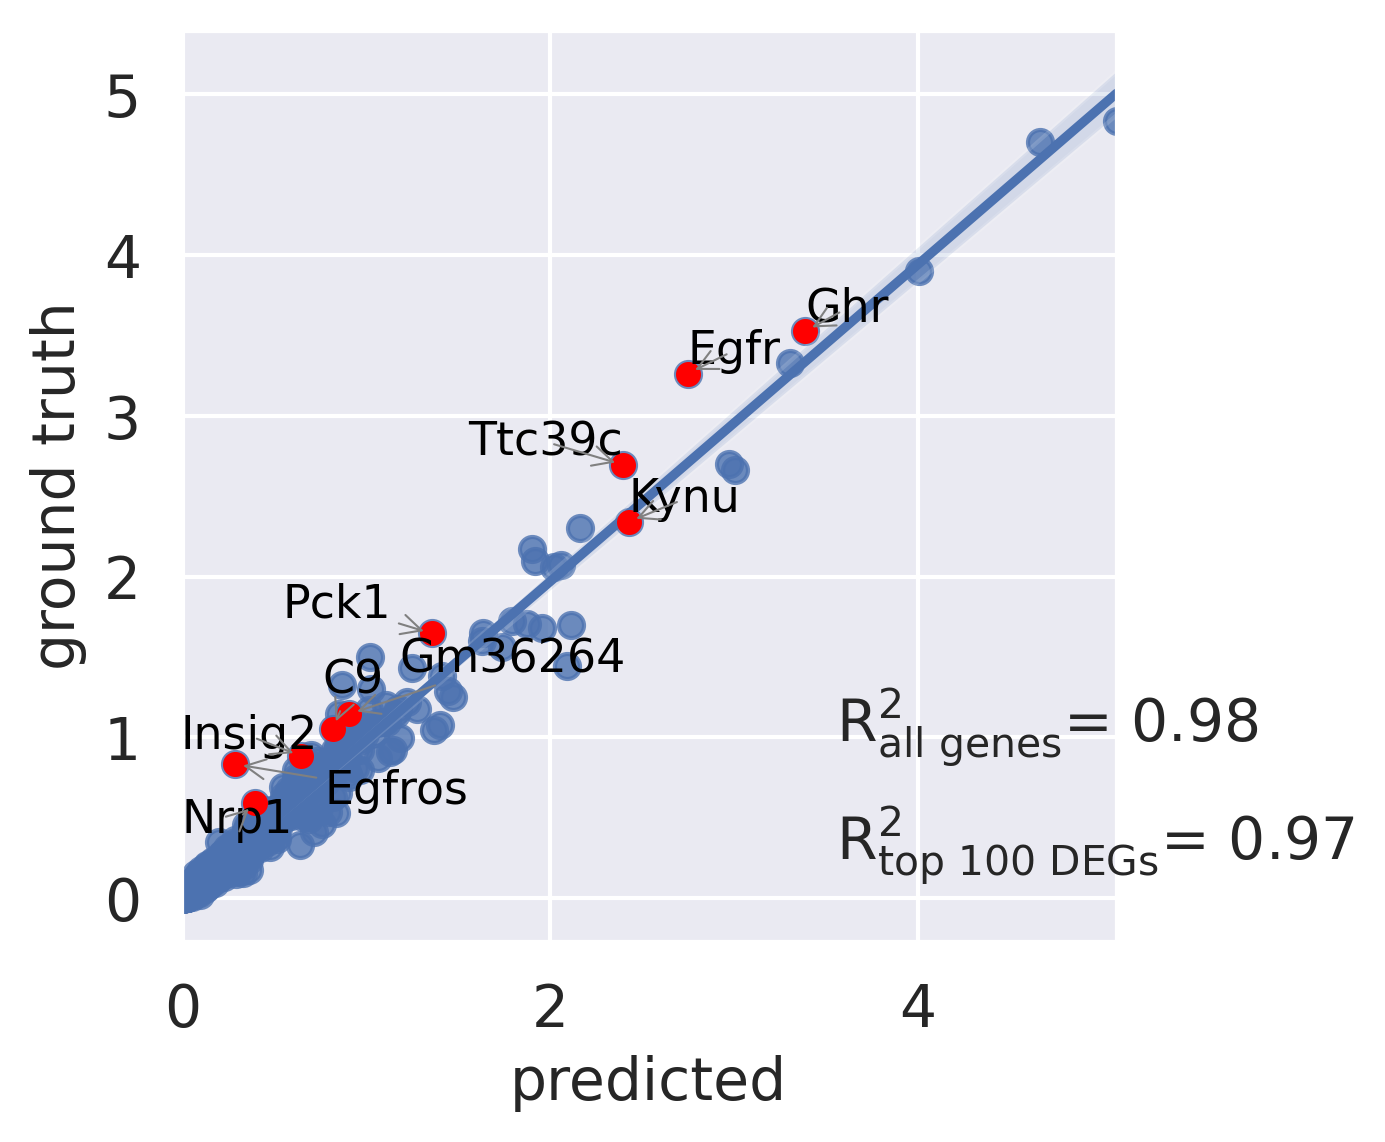

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 0.01 
 R2 All: 0.9999457303749192 
 R2 Top 100: 0.997904483025438


... storing 'dose' as categorical


0.03


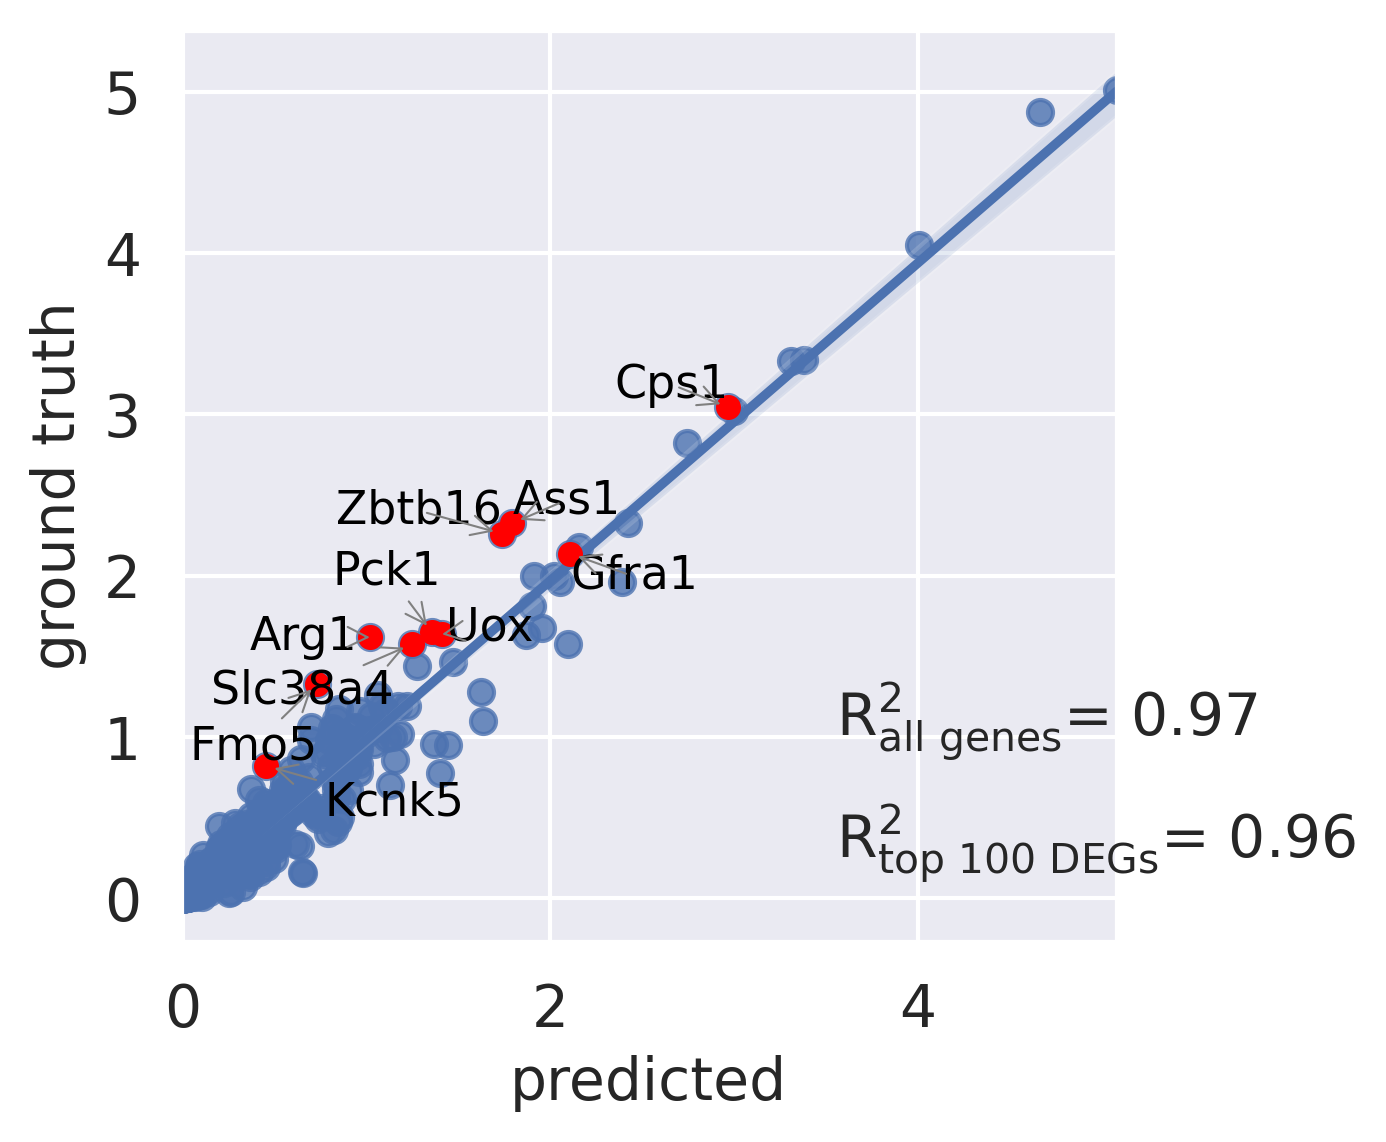

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 0.03 
 R2 All: 0.9995470052310267 
 R2 Top 100: 1.003360411585673


... storing 'dose' as categorical


0.1


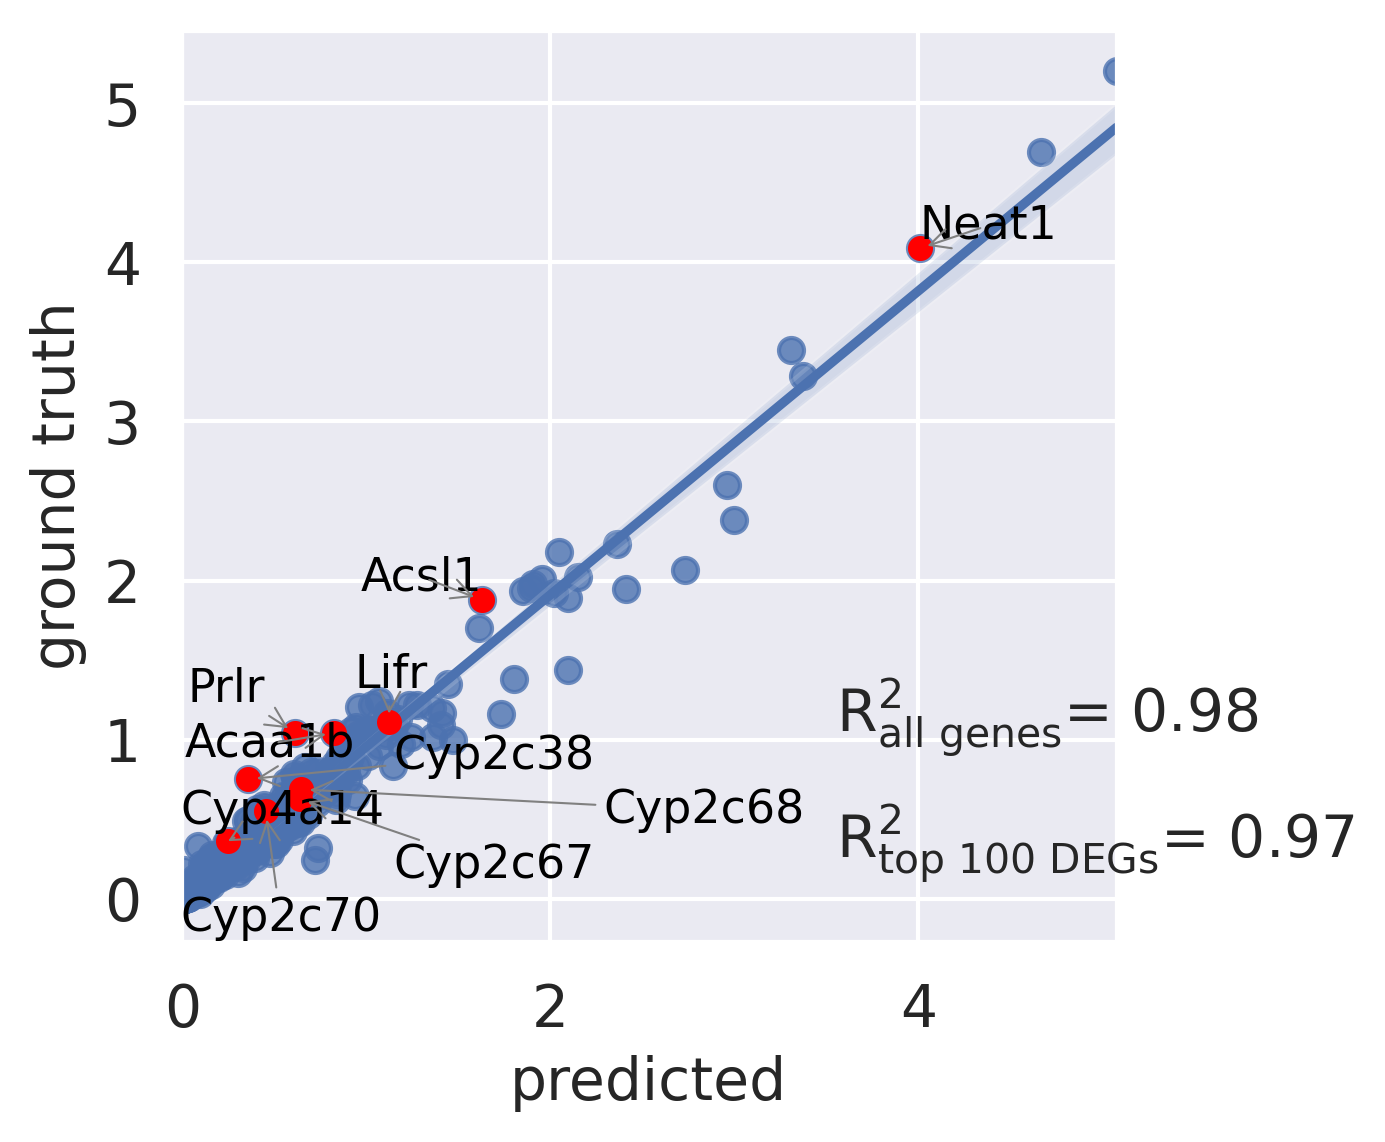

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 0.1 
 R2 All: 1.002212196243269 
 R2 Top 100: 1.0052698915631115


... storing 'dose' as categorical


0.3


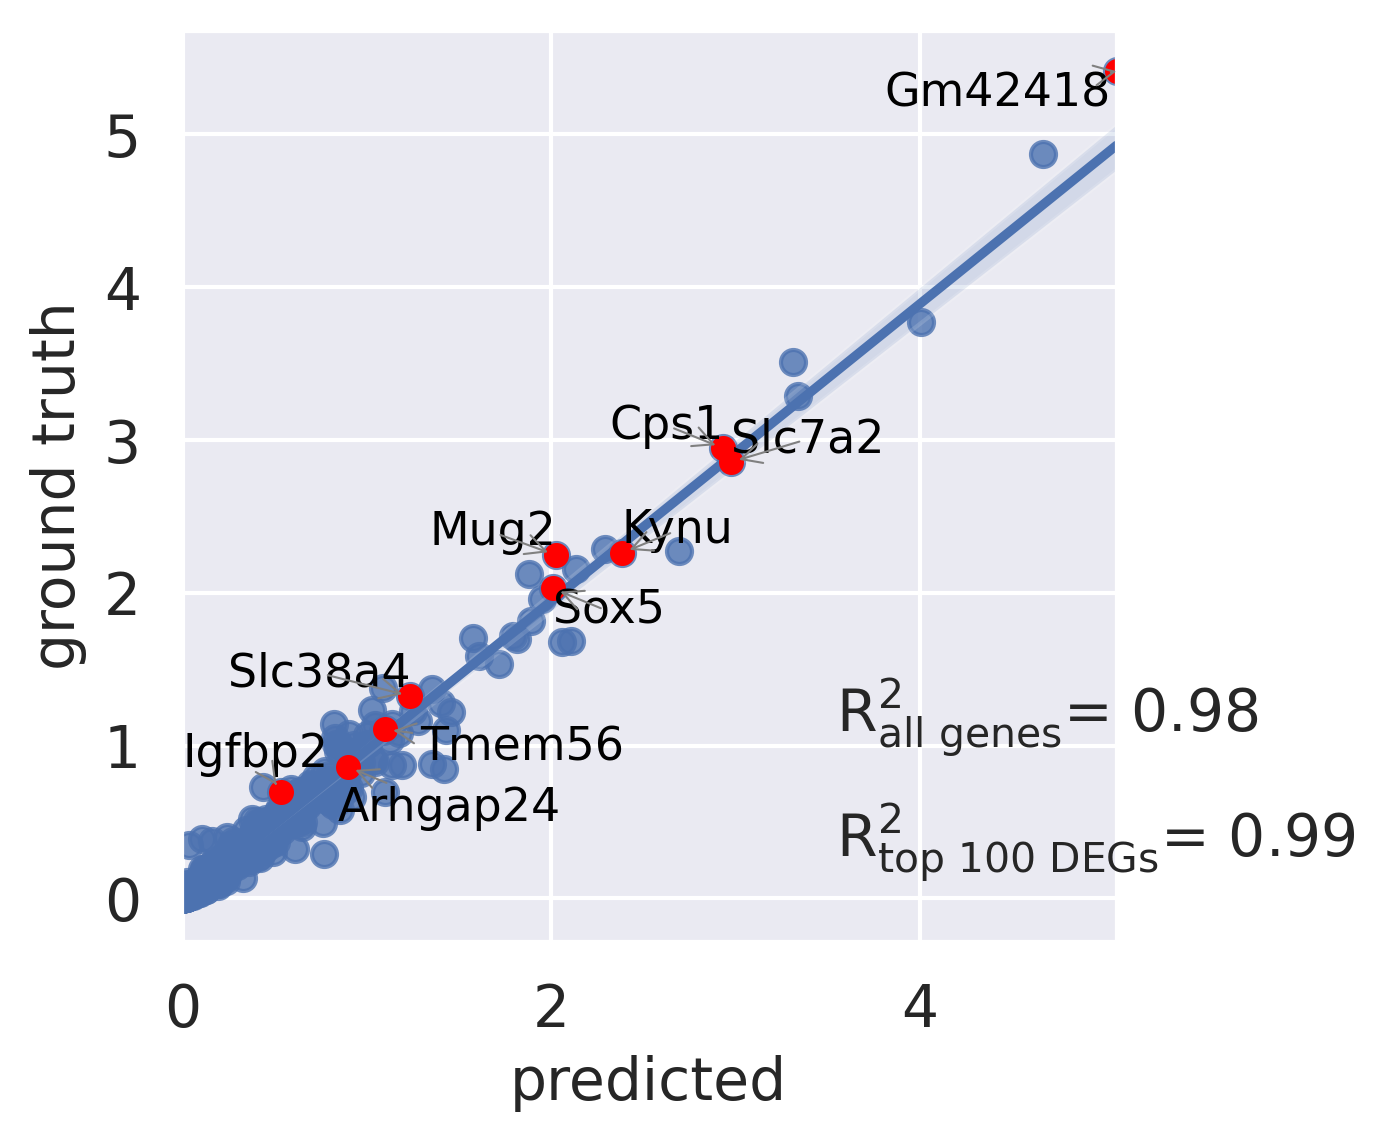

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 0.3 
 R2 All: 1.0007125907375471 
 R2 Top 100: 1.0004166527429195


... storing 'dose' as categorical


1.0


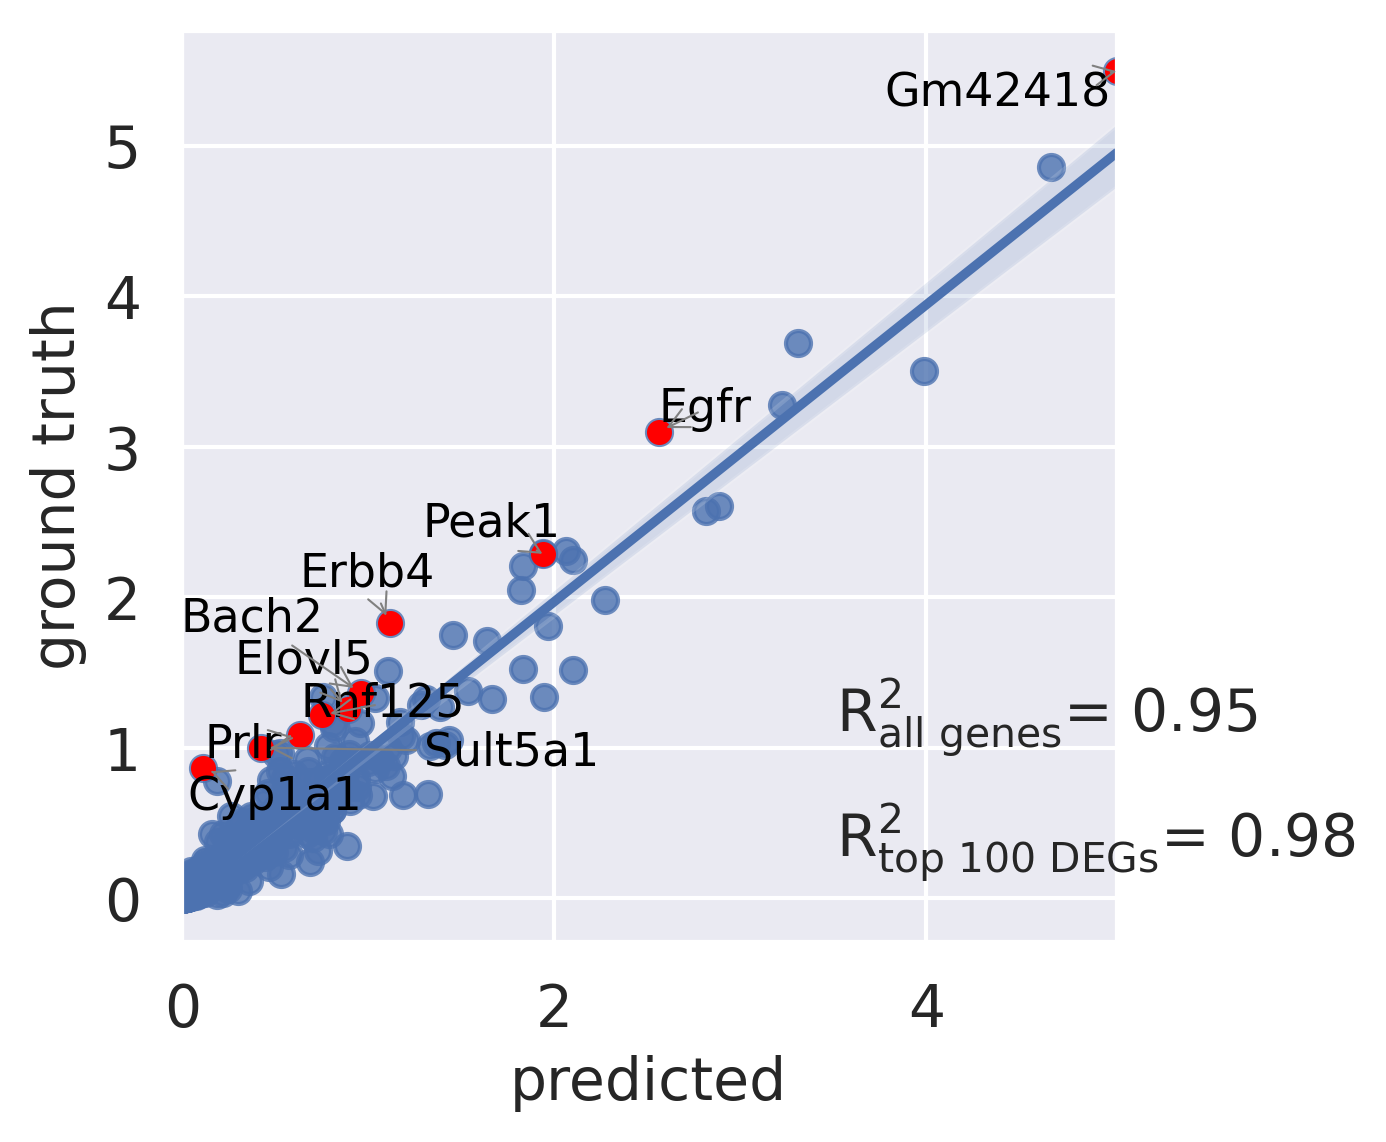

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 1.0 
 R2 All: 1.006138743885212 
 R2 Top 100: 1.0167584924988595


... storing 'dose' as categorical


3.0


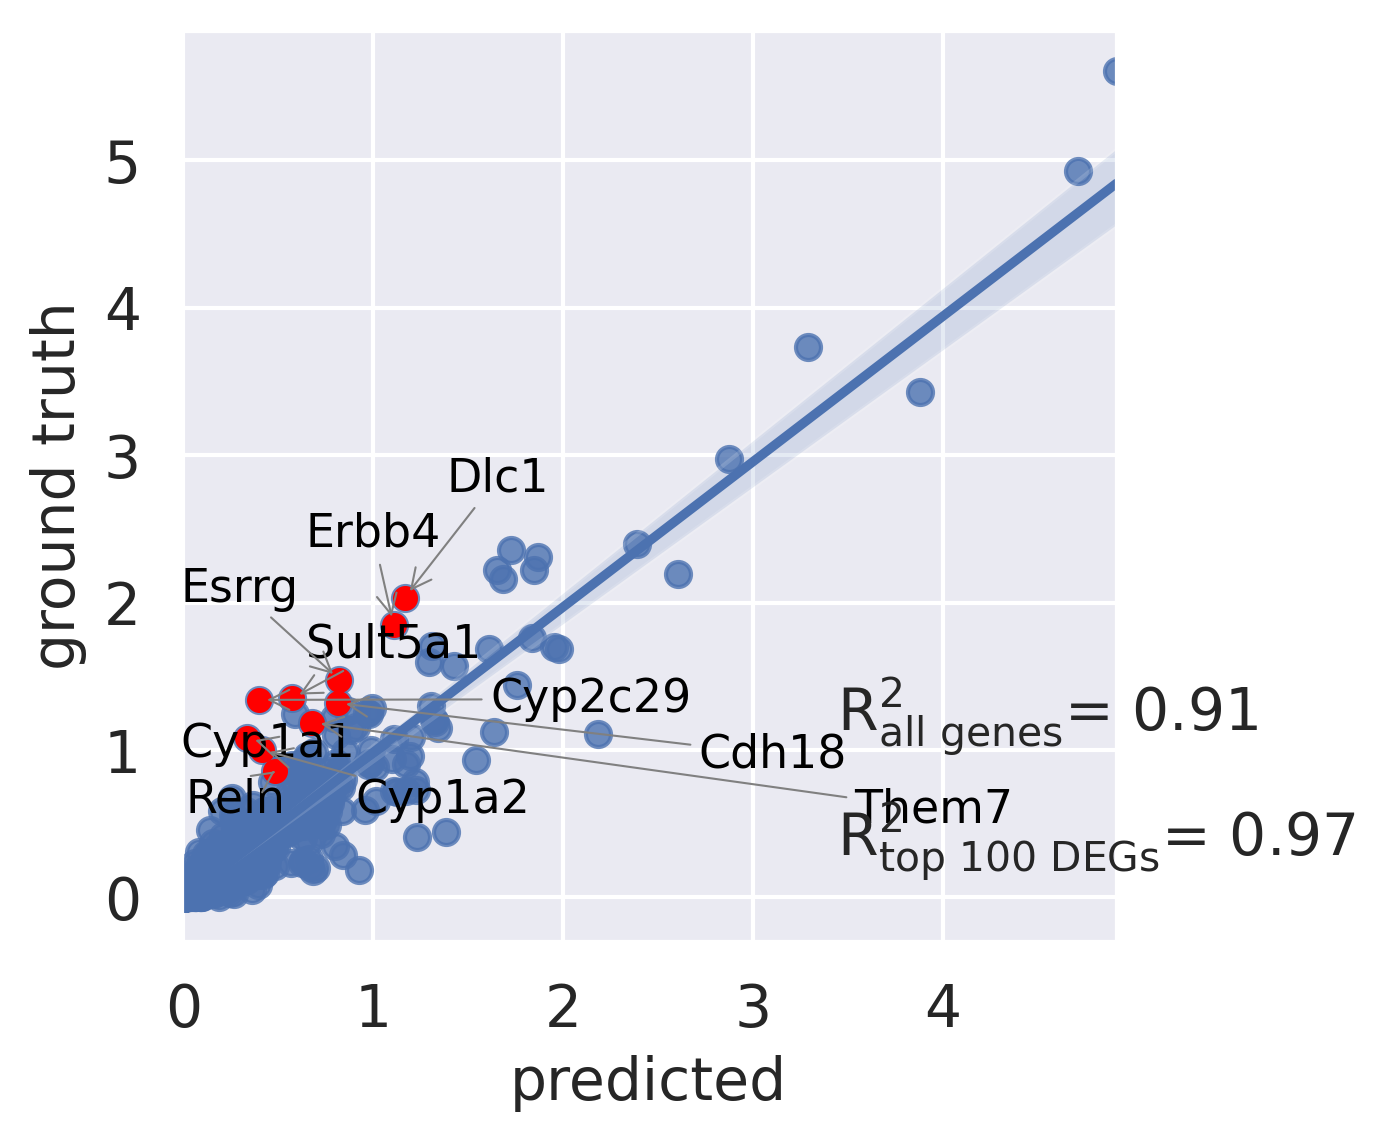

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 3.0 
 R2 All: 1.0419627325534038 
 R2 Top 100: 1.0038051916609956


... storing 'dose' as categorical


10.0


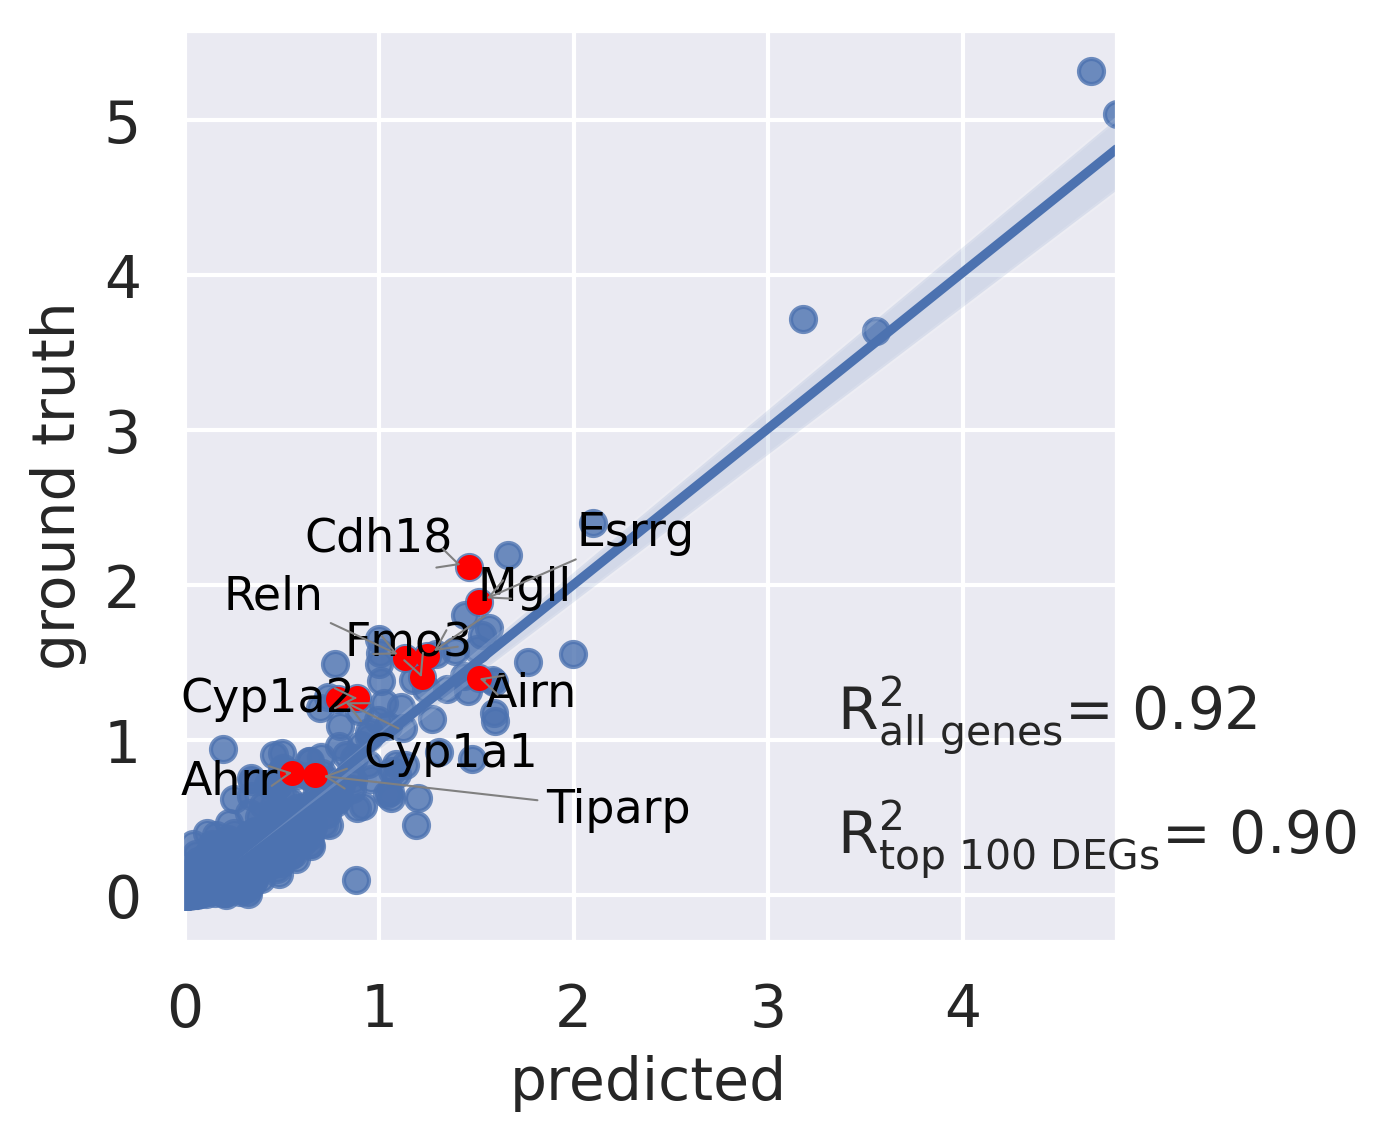

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 10.0 
 R2 All: 1.1981812903256035 
 R2 Top 100: 1.1105750475996488


... storing 'dose' as categorical


30.0


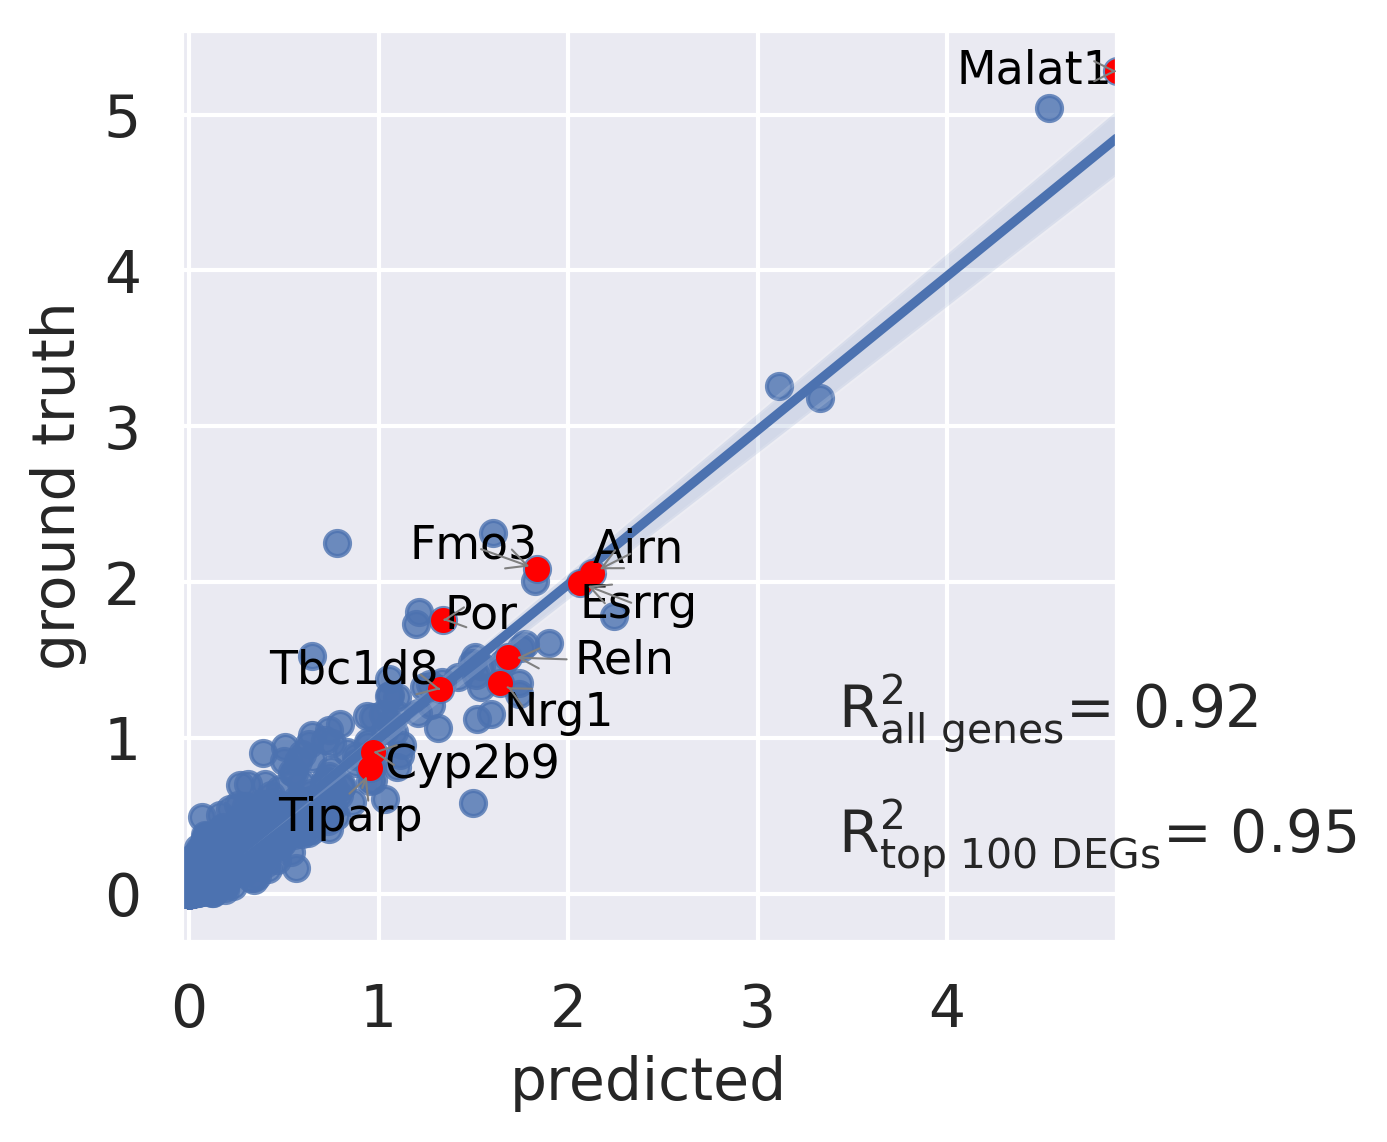

Model: VAE
 Cell: Hepatocytes - portal
 Regression: True 
 Dose: 30.0 
 R2 All: 1.4652627386693178 
 R2 Top 100: 1.188529687020579


In [7]:
#Regression   
regression = True
dr_dict, delta, reg = model.predict(
    ctrl_key='0.0',
    treat_key='30.0',
    cell_type_to_predict=cell,
    regression = regression,
    continuous = True,
    doses = doses)

for key in dr_dict.keys():
    dr_dict[key].obs["Dose"] = f'{key} scVIDR'

ctrl_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == 0))]
eval_dict1 = {}

for d in doses[1:]:
    stim_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == d))]
    eval_dict1[d] = ctrl_adata.concatenate(stim_adata, dr_dict[d])
    eval_dict1[d].obs["dose"] = [str(i) if type(i) == float else i for i in eval_dict1[d].obs['Dose']]

for d in doses[1:]:
    cell_adata = adata[adata.obs["celltype"] ==cell]
    sc.tl.rank_genes_groups(cell_adata, groupby="dose", method="wilcoxon")
    diff_genes = cell_adata.uns["rank_genes_groups"]["names"][str(d)]
    print(f"{d}")
    r2_value1 = model.reg_mean_plot(
        eval_dict1[d],
        condition_key = "dose",
        cell_type_key = "celltype",
        axis_keys={"x": f"{d} scVIDR", "y": f"{d}"},
        gene_list=diff_genes[:10],
        top_100_genes = diff_genes[:25],
        labels={"x": "predicted", "y": "ground truth"},
        path_to_save=f"../figures/reg_mean_{cell}_{d}.pdf",
        show=True,
        legend=False)
    r2_value2 = model.reg_mean_plot(
        eval_dict1[d],
        condition_key = "dose",
        cell_type_key = "celltype",
        axis_keys={"x": f"0.0", "y": f"{d}"},
        gene_list=diff_genes[:10],
        top_100_genes = diff_genes[:25],
        labels={"x": "predicted", "y": "ground truth"},
        path_to_save=f"../figures/reg_mean_{cell}_{d}.pdf",
        show=False,
        legend=False)
    print(f"Model: {model_name}\n Cell: {cell}\n Regression: {regression} \n Dose: {d} \n R2 All: {r2_value1[0]/r2_value2[0]} \n R2 Top 100: {r2_value1[1]/r2_value2[1]}")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 2287 cells, 5000 vars, 9 batches, 
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 14260 cells, 5000 vars, 9 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mea

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique,

0.01


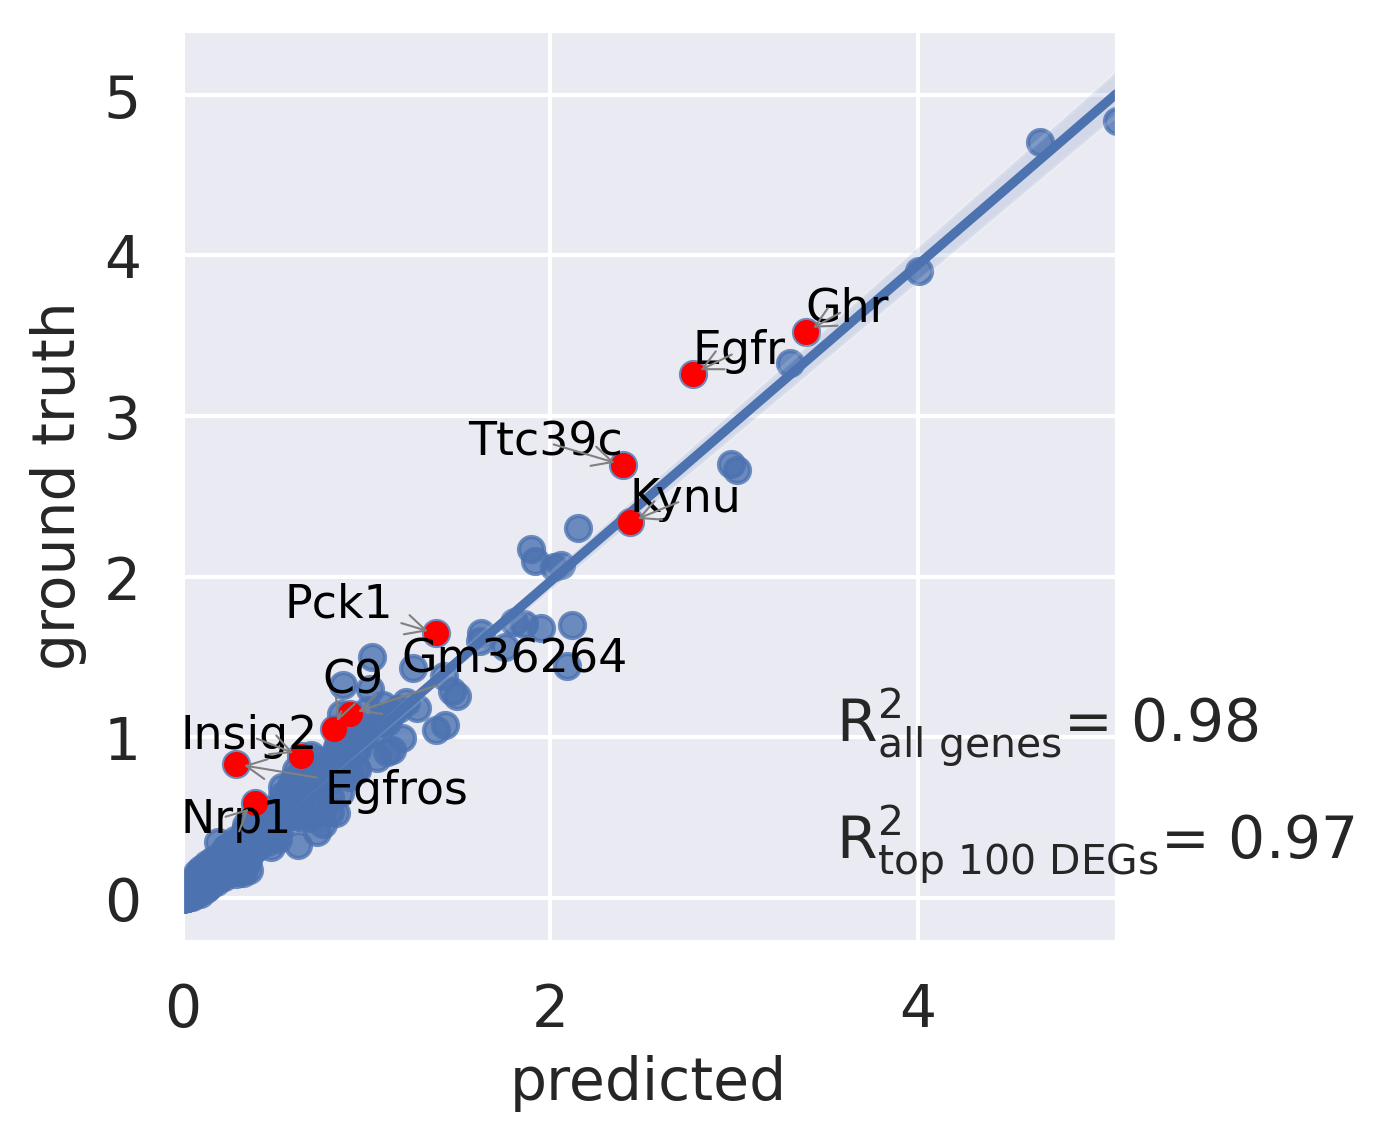

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: False 
 Dose: 0.01 
 R2 All: 0.999860680974945 
 R2 Top 100: 0.9998531915824196


... storing 'dose' as categorical


0.03


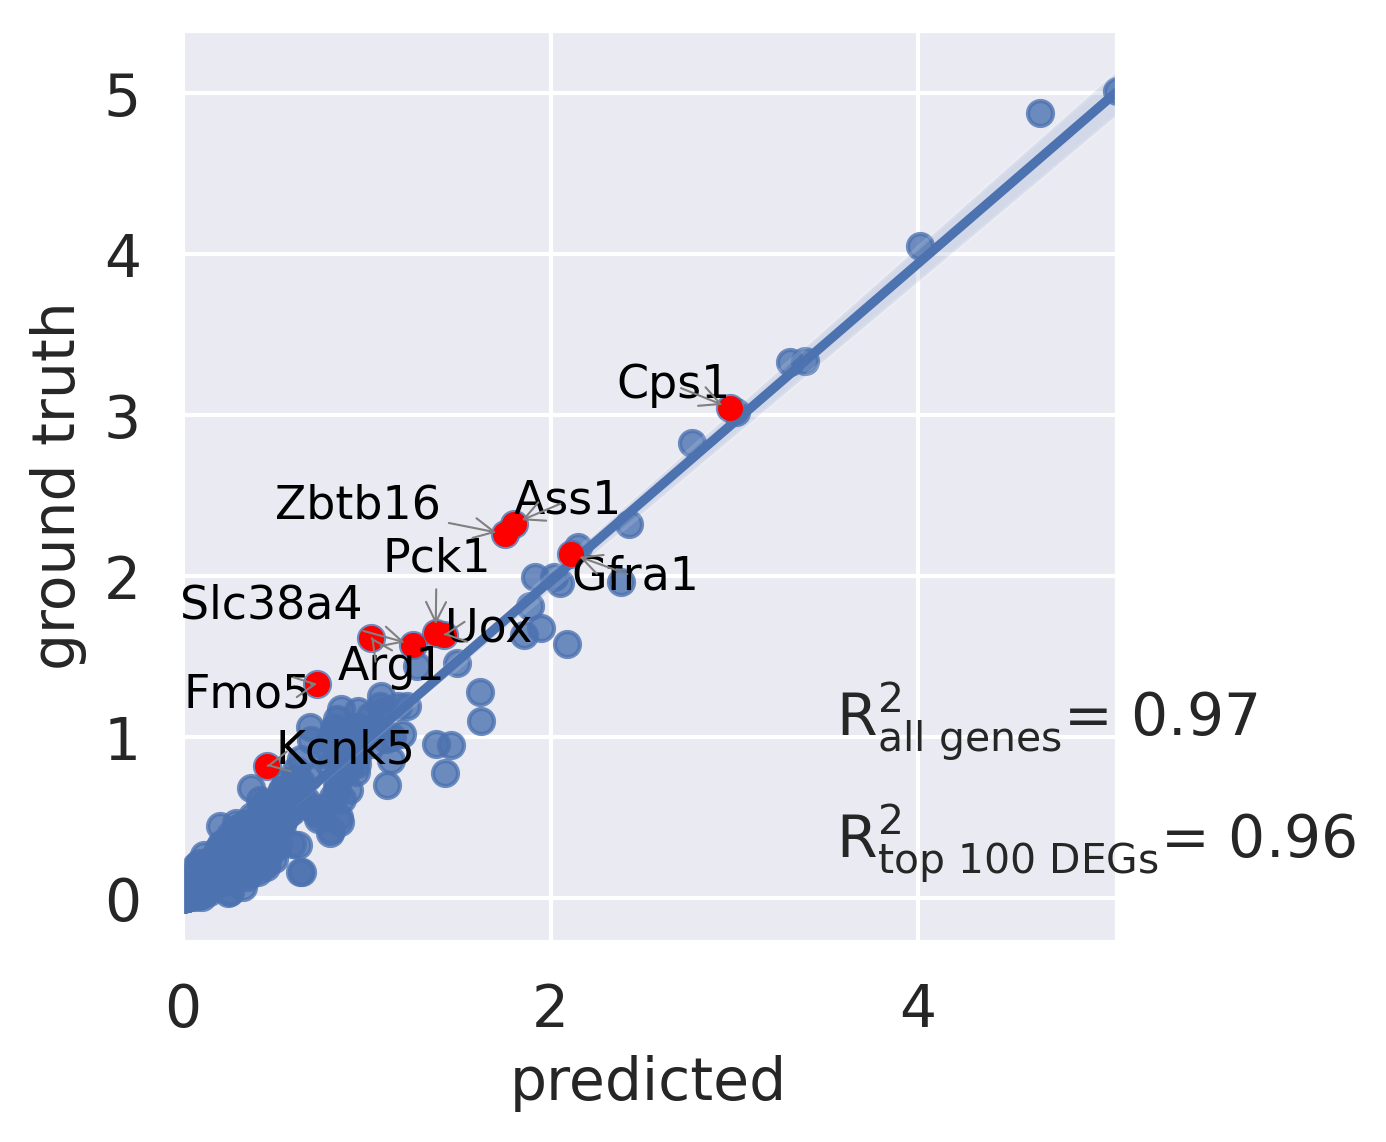

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: False 
 Dose: 0.03 
 R2 All: 1.000127275652056 
 R2 Top 100: 1.003498742714365


... storing 'dose' as categorical


0.1


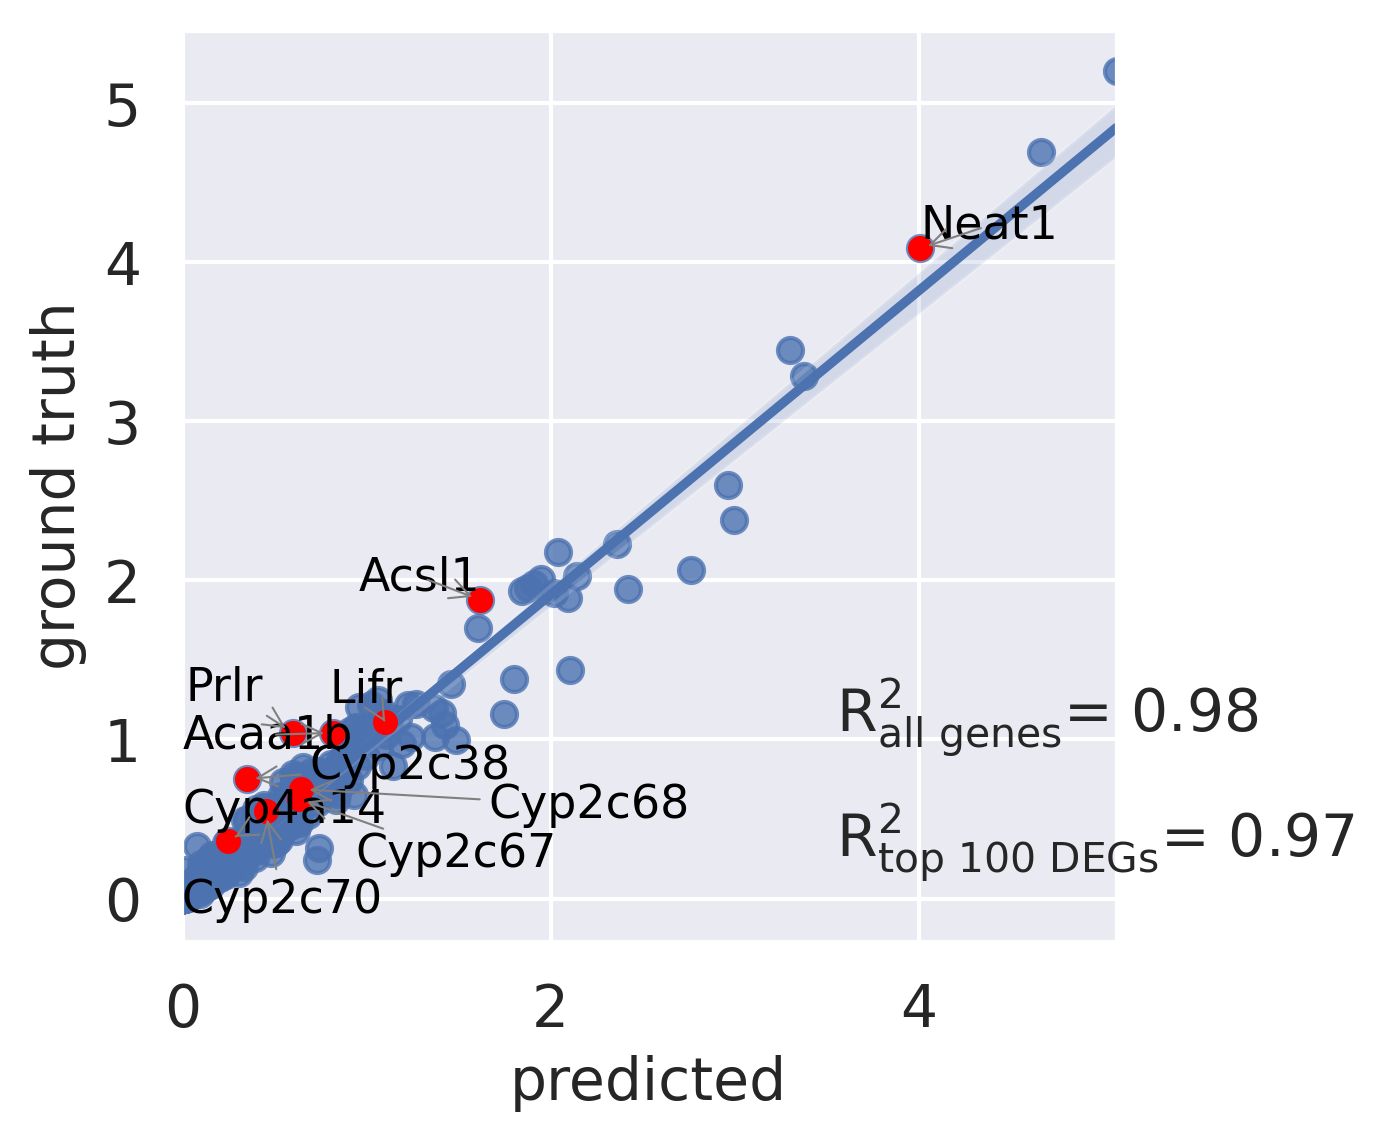

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: False 
 Dose: 0.1 
 R2 All: 1.0012026534483665 
 R2 Top 100: 1.0030401145406367


... storing 'dose' as categorical


0.3


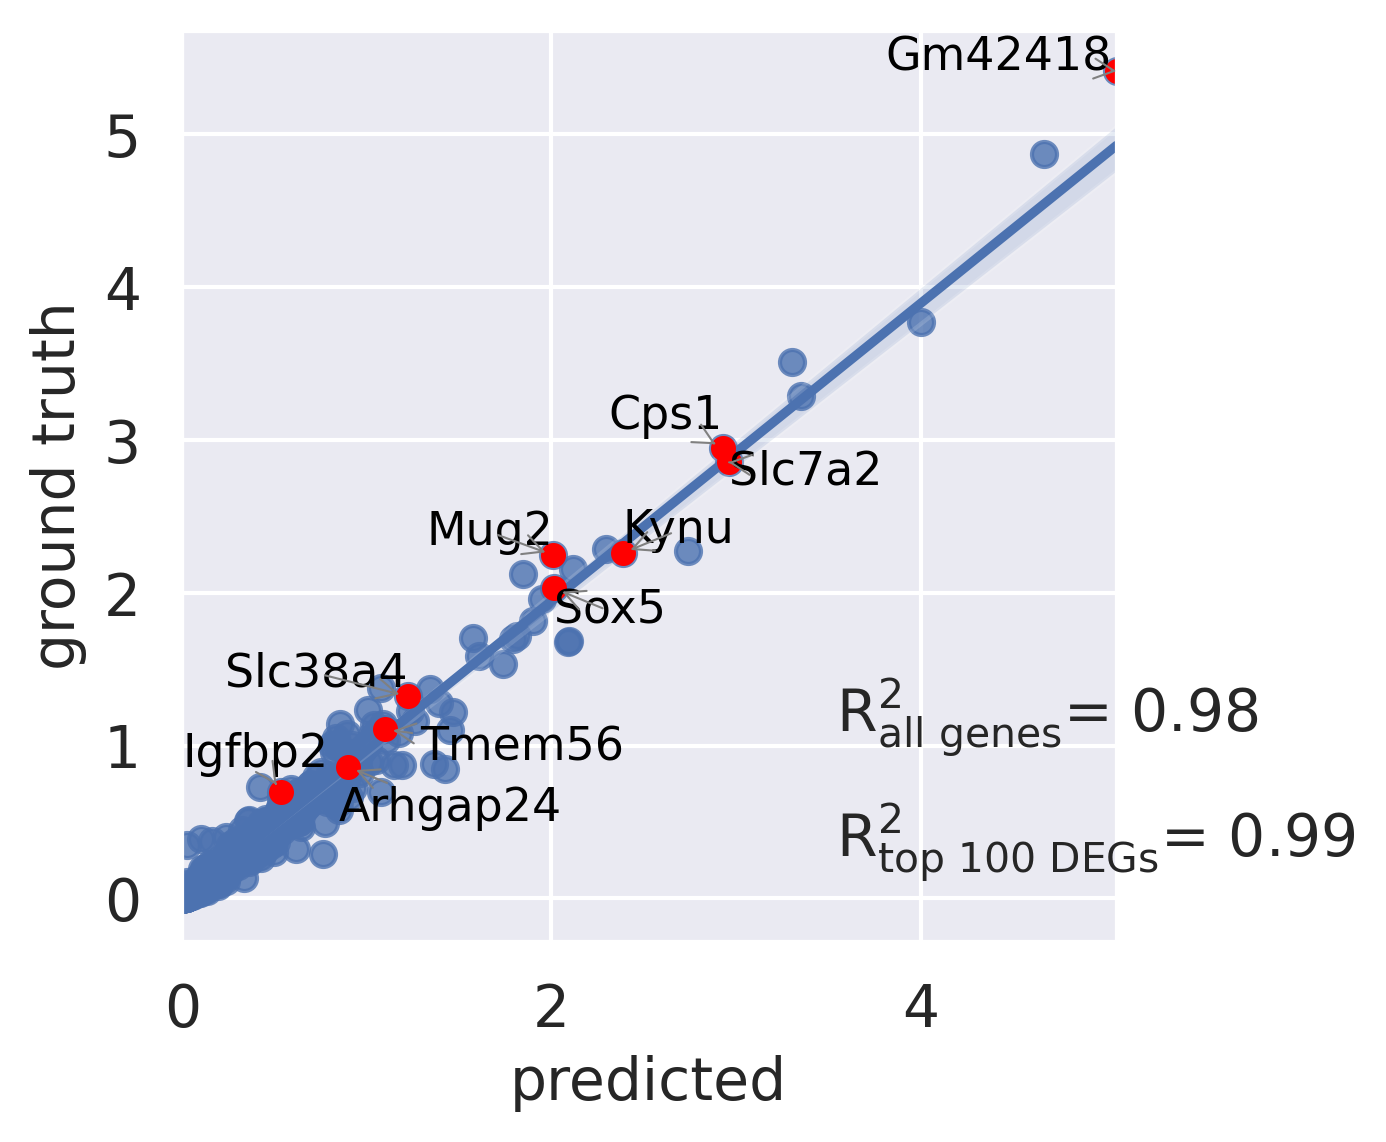

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: False 
 Dose: 0.3 
 R2 All: 0.9998907869784612 
 R2 Top 100: 1.0003652504181646


... storing 'dose' as categorical


1.0


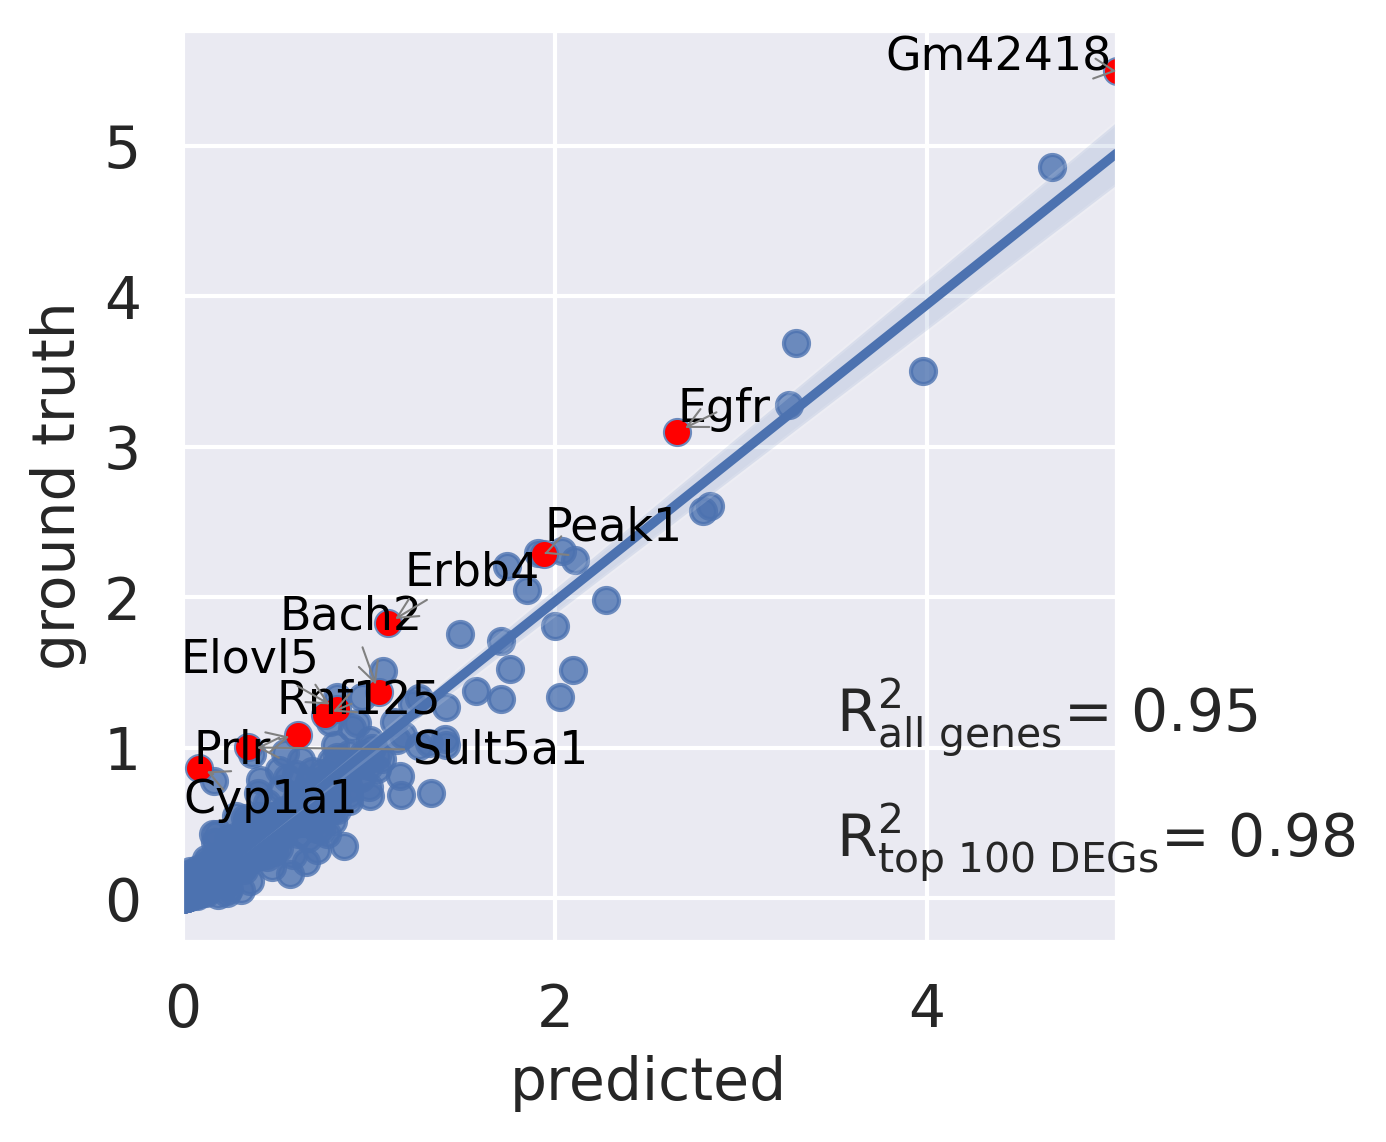

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: False 
 Dose: 1.0 
 R2 All: 1.0052199473007544 
 R2 Top 100: 1.013195643706713


... storing 'dose' as categorical


3.0


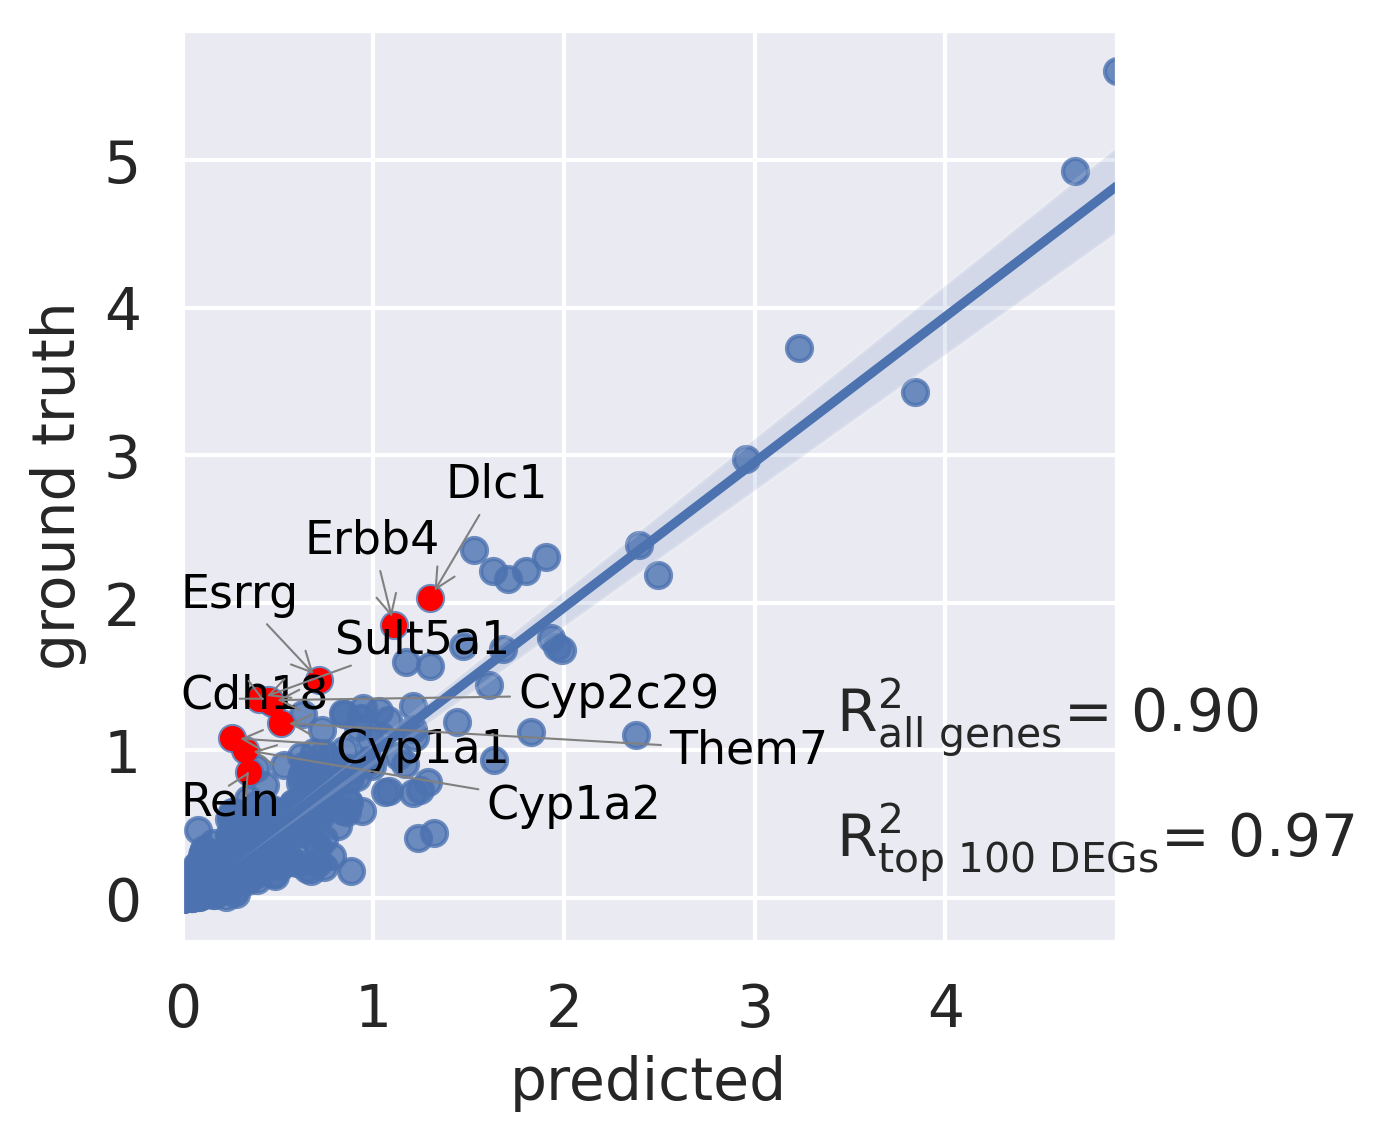

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: False 
 Dose: 3.0 
 R2 All: 1.0321257864685958 
 R2 Top 100: 1.0055961384731964


... storing 'dose' as categorical


10.0


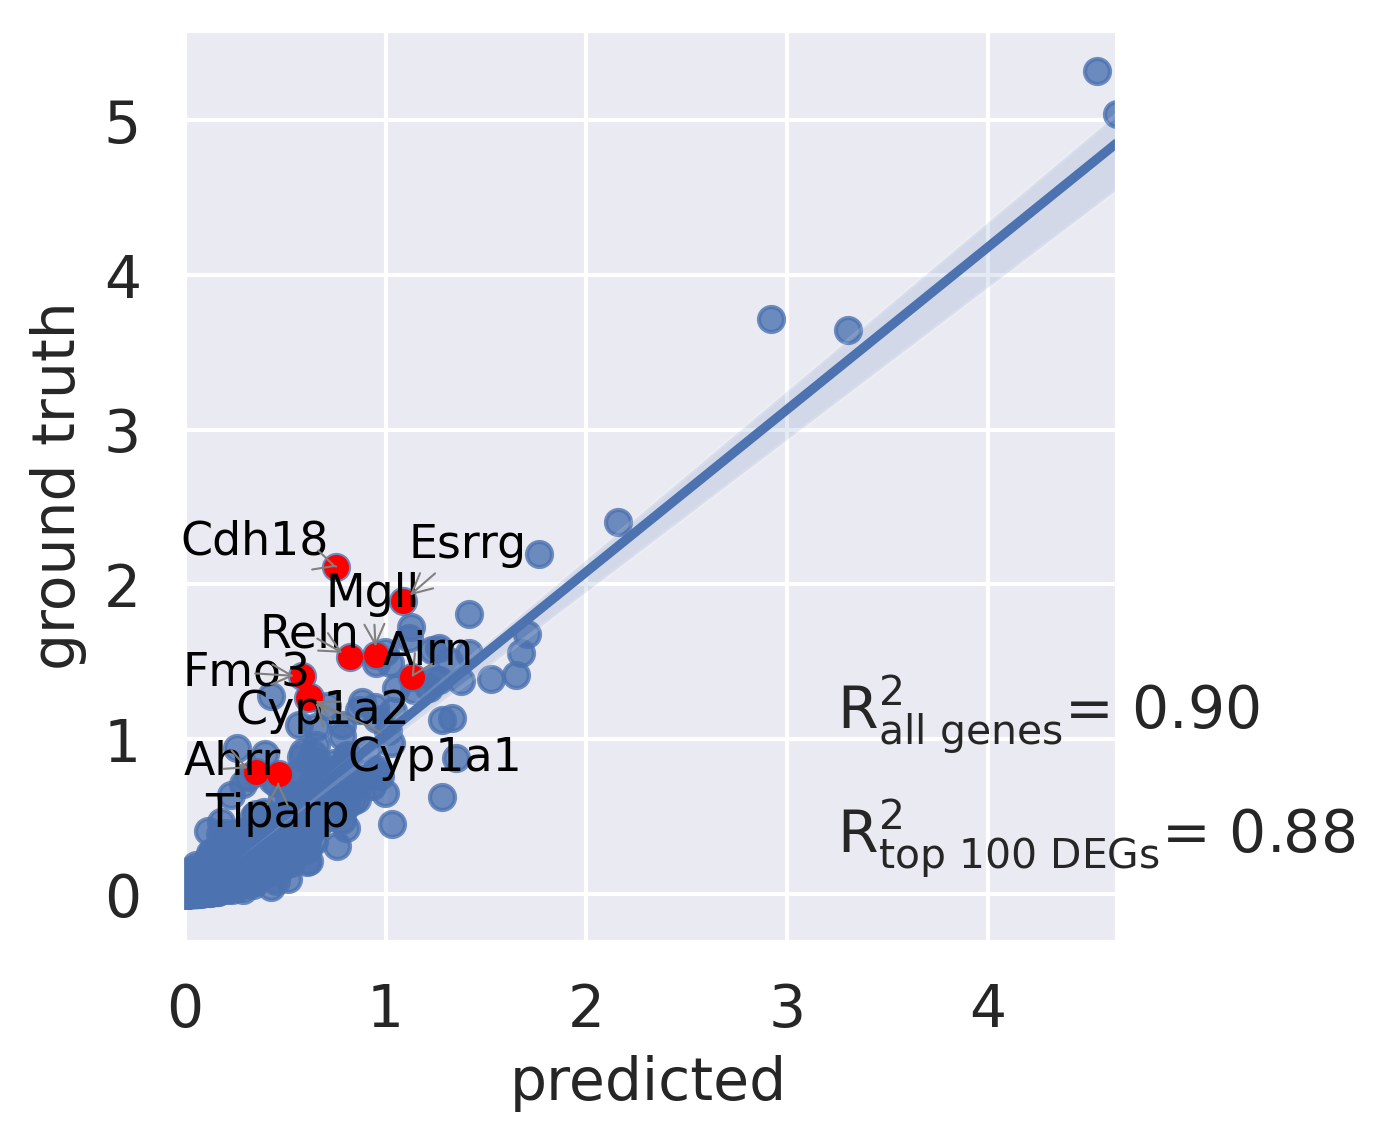

Trying to set attribute `.obs` of view, copying.


Model: VAE
 Cell: Hepatocytes - portal
 Regression: False 
 Dose: 10.0 
 R2 All: 1.1629921565058632 
 R2 Top 100: 1.0781834668700891


... storing 'dose' as categorical


30.0


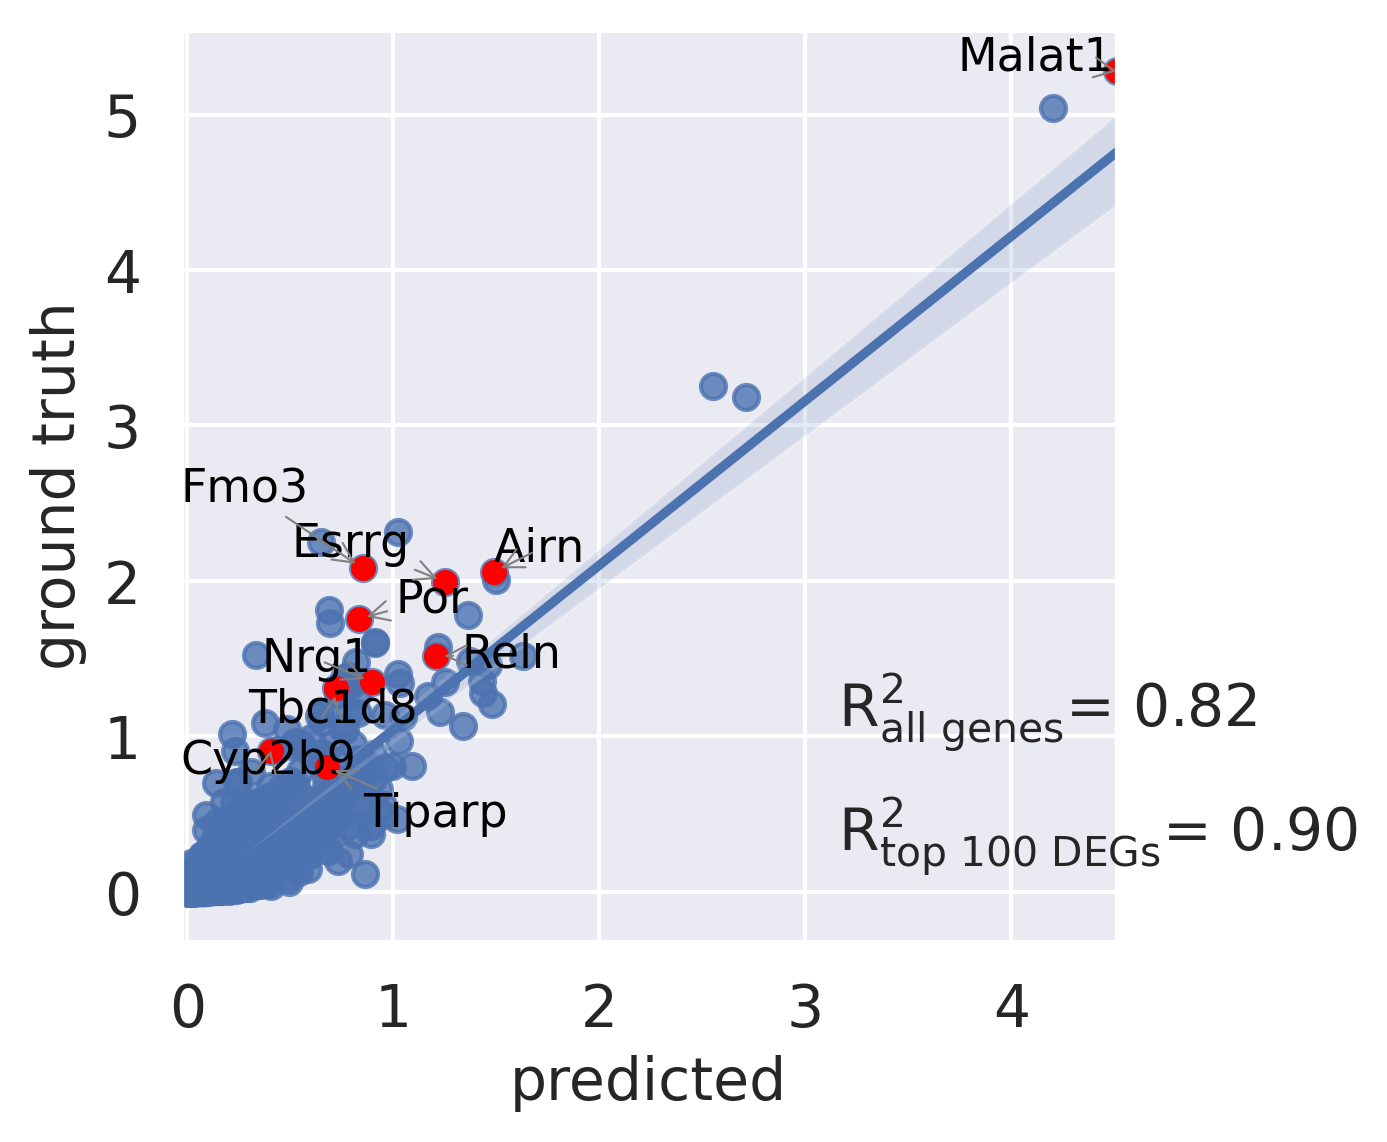

Model: VAE
 Cell: Hepatocytes - portal
 Regression: False 
 Dose: 30.0 
 R2 All: 1.298013701649475 
 R2 Top 100: 1.1335553287004891


In [8]:
#Regression   
regression = False
dr_dict, delta = model.predict(
    ctrl_key='0.0',
    treat_key='30.0',
    cell_type_to_predict=cell,
    regression = regression,
    continuous = True,
    doses = doses)

for key in dr_dict.keys():
    dr_dict[key].obs["Dose"] = f'{key} VAEArith'

ctrl_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == 0))]
eval_dict2 = {}

for d in doses[1:]:
    stim_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs['Dose'] == d))]
    eval_dict2[d] = ctrl_adata.concatenate(stim_adata, dr_dict[d])
    eval_dict2[d].obs["dose"] = [str(i) if type(i) == float else i for i in eval_dict2[d].obs['Dose']]

for d in doses[1:]:
    cell_adata = adata[adata.obs["celltype"] ==cell]
    sc.tl.rank_genes_groups(cell_adata, groupby="dose", method="wilcoxon")
    diff_genes = cell_adata.uns["rank_genes_groups"]["names"][str(d)]
    print(f"{d}")
    r2_value1 = model.reg_mean_plot(
        eval_dict2[d],
        condition_key = "dose",
        cell_type_key = "celltype",
        axis_keys={"x": f"{d} VAEArith", "y": f"{d}"},
        gene_list=diff_genes[:10],
        top_100_genes = diff_genes[:25],
        labels={"x": "predicted", "y": "ground truth"},
        path_to_save=f"../figures/reg_mean_{cell}_{d}.pdf",
        show=True,
        legend=False)
    r2_value2 = model.reg_mean_plot(
        eval_dict2[d],
        condition_key = "dose",
        cell_type_key = "celltype",
        axis_keys={"x": f"0.0", "y": f"{d}"},
        gene_list=diff_genes[:10],
        top_100_genes = diff_genes[:25],
        labels={"x": "predicted", "y": "ground truth"},
        path_to_save=f"../figures/reg_mean_{cell}_{d}.pdf",
        show=False,
        legend=False)
    print(f"Model: {model_name}\n Cell: {cell}\n Regression: {regression} \n Dose: {d} \n R2 All: {r2_value1[0]/r2_value2[0]} \n R2 Top 100: {r2_value1[1]/r2_value2[1]}")

In [9]:
eval_dict = {d:eval_dict1[d].concatenate(eval_dict2[d][["VAEArith" in i for i in eval_dict2[d].obs["dose"]]]) for d in doses[1:]}

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique,

In [10]:
eval_adata = eval_dict[0.01].concatenate([eval_dict[d] for d in doses[2:]])

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [11]:
response = []
for i in eval_adata.obs.dose:
    if "scVIDR" in i:
        response.append("scVIDR")
    elif "VAEArith" in i:
        response.append("VAEArith")
    else:
        response.append("Real Expression")
eval_adata.obs["Response"] = response

In [17]:
df = eval_adata.obs[["Dose", "Response"]]
df["Ahrr"] = eval_adata[:, "Ahrr"].X
df["Dose"] = [float(i.split(" ")[0]) if type(i) == str else i for i in df["Dose"]]
df["Log Dose"] = [np.log1p(i) for i in df["Dose"]]

In [15]:
df_dict = {"Model":[], "Log Dose":[], "Sinkhorn Distance":[]}
mmd = geomloss.SamplesLoss("sinkhorn")
log_dose = df["Log Dose"].unique()
for dose in log_dose[1:]:
    df_dose = df[df["Log Dose"] == dose]
    real_ahrr = df_dose[df_dose.Response == "Real Expression"].Ahrr.values
    scVIDR_ahrr = df_dose[df_dose.Response == "scVIDR"].Ahrr.values
    VAEArith_ahrr = df_dose[df_dose.Response == "VAEArith"].Ahrr.values
    real_tensor = torch.Tensor([real_ahrr]).T
    scVIDR_tensor = torch.Tensor([scVIDR_ahrr]).T
    VAEArith_tensor = torch.Tensor([VAEArith_ahrr]).T
    stat_dist = mmd(real_tensor, scVIDR_tensor).numpy().tolist()
    df_dict["Log Dose"].append(f'{dose:.{3}f}')
    df_dict["Model"].append("scVIDR")
    df_dict["Sinkhorn Distance"].append(stat_dist)
    print(f"scVIDR {dose}: {stat_dist}")
    
    stat_dist = mmd(real_tensor, VAEArith_tensor).numpy().tolist()
    df_dict["Log Dose"].append(f'{dose:.{3}f}')
    df_dict["Model"].append("VAEArith")
    df_dict["Sinkhorn Distance"].append(stat_dist)
    print(f"VAEArith {dose}: {stat_dist}")

scVIDR 0.009950330853168083: 7.731077494099736e-05
VAEArith 0.009950330853168083: 6.842056609457359e-05
scVIDR 0.0295588022415444: 7.848521636333317e-05
VAEArith 0.0295588022415444: 6.754948844900355e-05
scVIDR 0.09531017980432487: 8.383345266338438e-05
VAEArith 0.09531017980432487: 6.348206079564989e-05
scVIDR 0.26236426446749106: 0.0006527944933623075
VAEArith 0.26236426446749106: 0.0006179206538945436
scVIDR 0.6931471805599453: 0.02270549163222313
VAEArith 0.6931471805599453: 0.025518372654914856
scVIDR 1.3862943611198906: 0.07207520306110382
VAEArith 1.3862943611198906: 0.09400059282779694
scVIDR 2.3978952727983707: 0.13831457495689392
VAEArith 2.3978952727983707: 0.20426848530769348
scVIDR 3.4339872044851463: 0.10823146998882294
VAEArith 3.4339872044851463: 0.10162720084190369


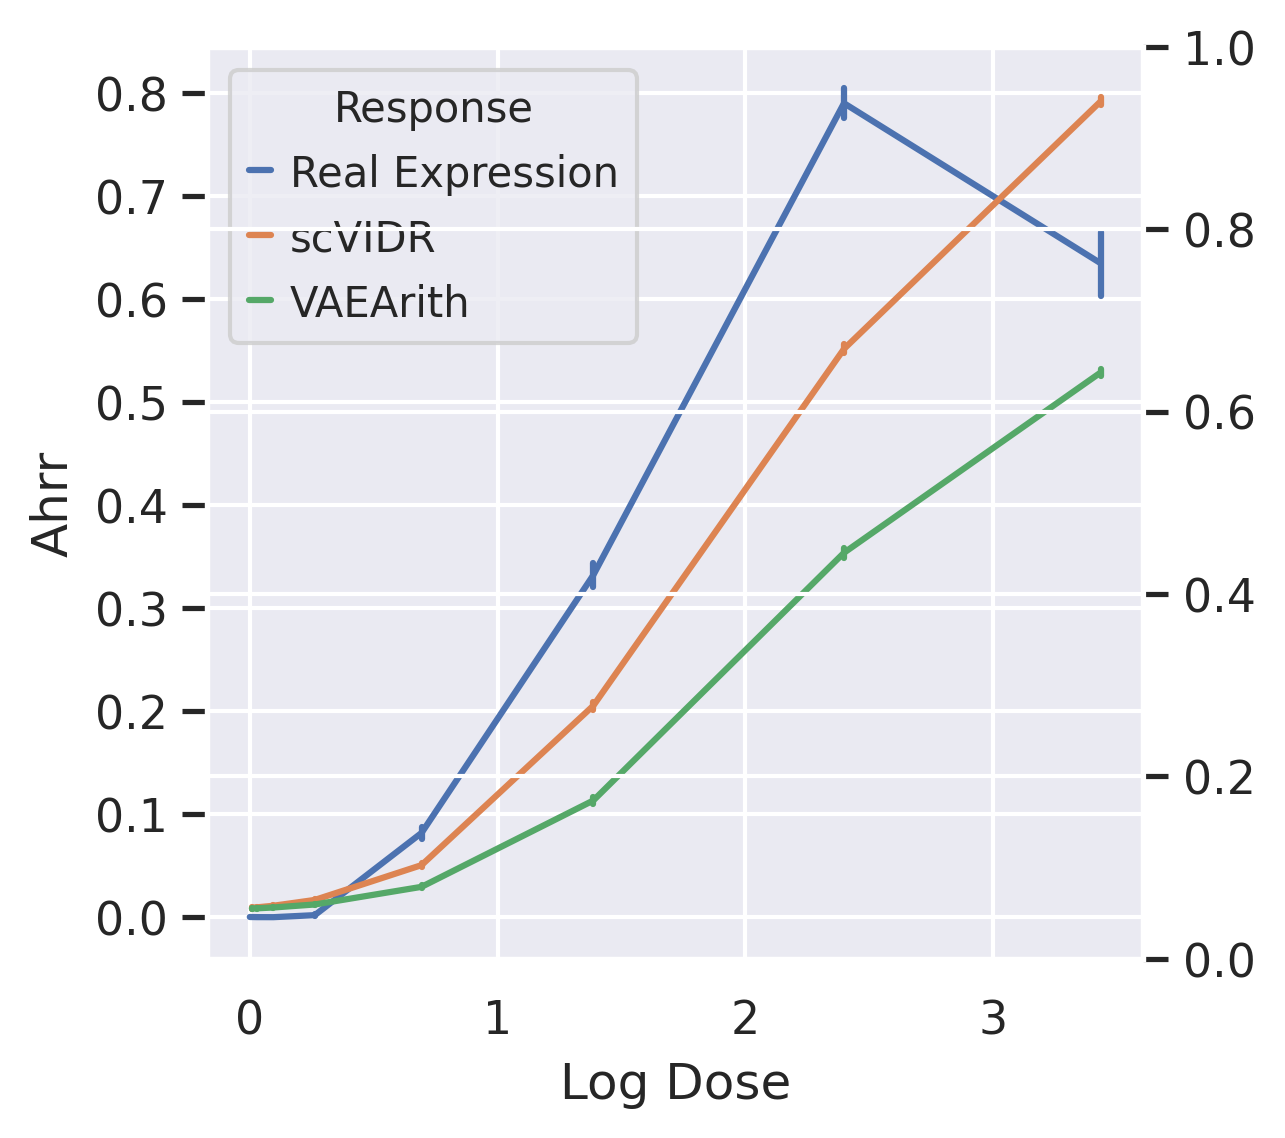

In [21]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.lineplot(x = "Log Dose", y = "Ahrr", hue = "Response", data = df, err_style="bars", ax = ax)
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='10') # for legend title
plt.savefig("../figures/3C.svg")
plt.show()

In [22]:
from matplotlib import cm

In [23]:
cm.tab10.colors[1:]

((1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

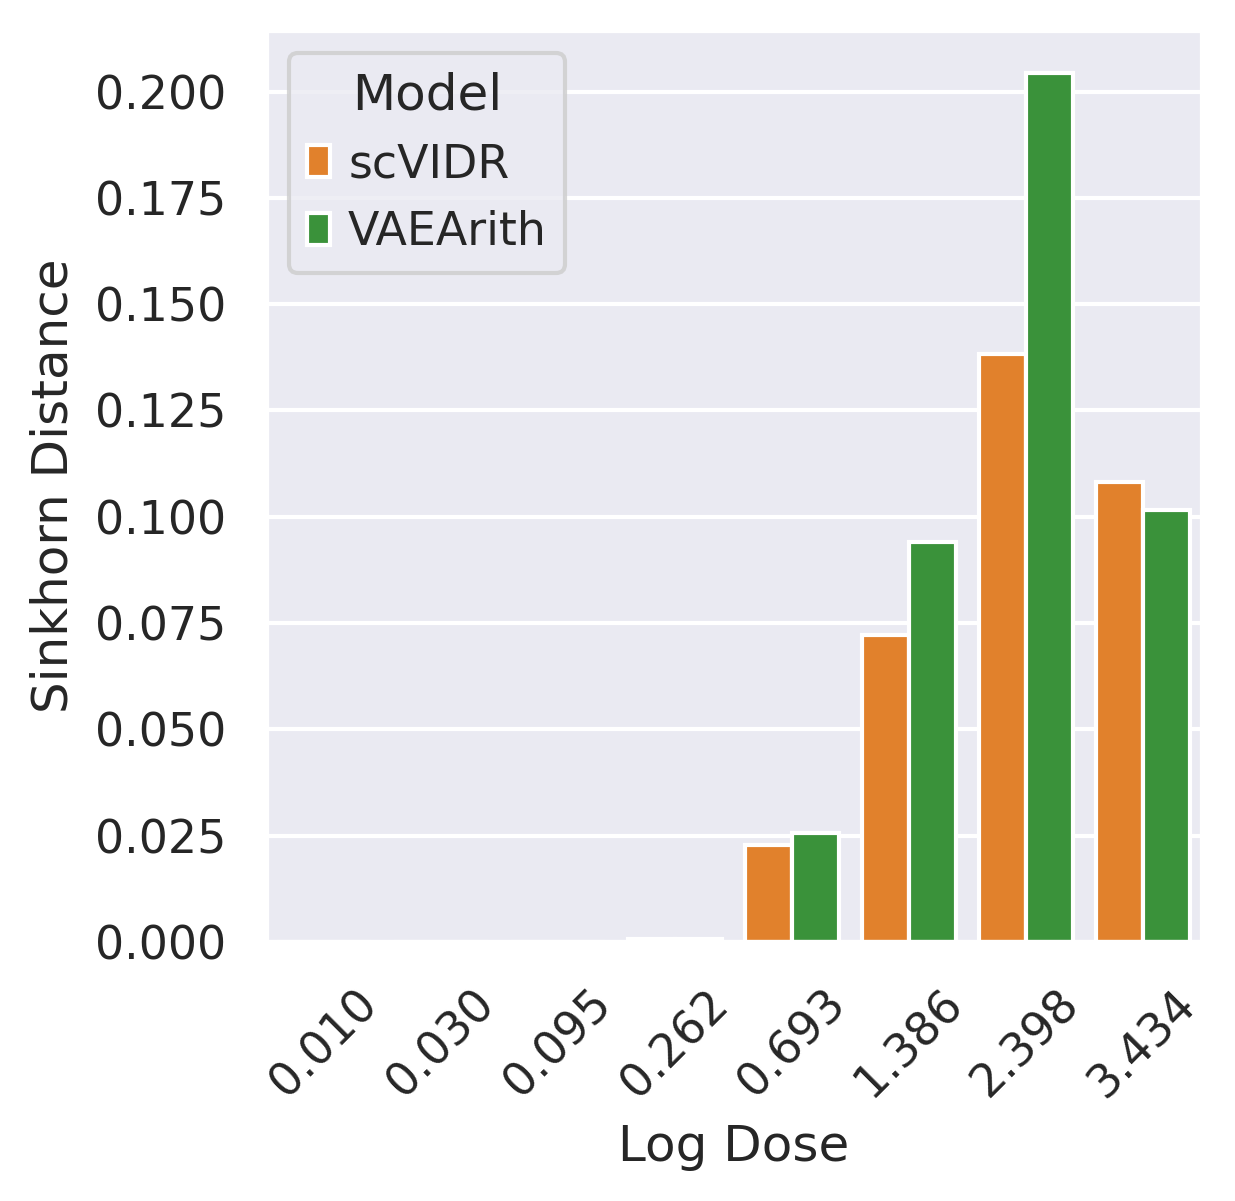

In [24]:
df_dists = pd.DataFrame(df_dict)
sns.barplot(x = "Log Dose", y = "Sinkhorn Distance", hue = "Model", data = df_dists, palette=cm.tab10.colors[1:])
plt.xticks(rotation = 45)
plt.show()